## Importing necessary libraries

In [ ]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from  sklearn.decomposition import  PCA
from sklearn import preprocessing
from sklearn import tree
from sklearn.manifold import TSNE
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm # Changed from svm33 to svm to import the svm module
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split


pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
train_data = pd.read_csv("/content/drive/MyDrive/test.csv")
test_data  = pd.read_csv("/content/drive/MyDrive/train.csv")

In [ ]:
train_data.shape

(2947, 563)

In [ ]:
train_data.head()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.257178          -0.023285          -0.014654         -0.938404   
1           0.286027          -0.013163          -0.119083         -0.975415   
2           0.275485          -0.026050          -0.118152         -0.993819   
3           0.270298          -0.032614          -0.117520         -0.994743   
4           0.274833          -0.027848          -0.129527         -0.993852   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.920091         -0.667683         -0.952501         -0.925249   
1         -0.967458         -0.944958         -0.986799         -0.968401   
2         -0.969926         -0.962748         -0.994403         -0.970735   
3         -0.973268         -0.967091         -0.995274         -0.974471   
4         -0.967445         -0.978295         -0.994111         -0.965953   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  tBodyAcc-max()-Y  tBodyAcc-max()-Z  \
0         -0.674302         -0.894088         -0.554577         -0.466223   
1         -0.945823         -0.894088         -0.554577         -0.806013   
2         -0.963483         -0.939260         -0.568512         -0.799116   
3         -0.968897         -0.938610         -0.568512         -0.799116   
4         -0.977346         -0.938610         -0.560831         -0.825894   

   tBodyAcc-min()-X  tBodyAcc-min()-Y  tBodyAcc-min()-Z  tBodyAcc-sma()  \
0          0.717208          0.635502          0.789497       -0.877764   
1          0.768031          0.683698          0.796706       -0.969097   
2          0.848305          0.667864          0.822442       -0.976782   
3          0.848305          0.667864          0.822442       -0.974418   
4          0.849179          0.670700          0.829897       -0.975283   

   tBodyAcc-energy()-X  tBodyAcc-energy()-Y  tBodyAcc-energy()-Z  \
0            -0.997766            -0.998414            -0.934345   
1            -0.999580            -0.999646            -0.997720   
2            -0.999954            -0.999570            -0.998720   
3            -0.999953            -0.999330            -0.998933   
4            -0.999954            -0.999467            -0.998823   

   tBodyAcc-iqr()-X  tBodyAcc-iqr()-Y  tBodyAcc-iqr()-Z  tBodyAcc-entropy()-X  \
0         -0.975669         -0.949824         -0.830478             -0.168084   
1         -0.994006         -0.973637         -0.950720             -0.302437   
2         -0.993456         -0.974266         -0.964976             -0.617916   
3         -0.995236         -0.978739         -0.969982             -0.749578   
4         -0.993498         -0.967032         -0.976257             -0.590576   

   tBodyAcc-entropy()-Y  tBodyAcc-entropy()-Z  tBodyAcc-arCoeff()-X,1  \
0             -0.378996              0.246217                0.521204   
1             -0.348243             -0.404785                0.507492   
2             -0.695490             -0.536693                0.242147   
3             -0.899226             -0.553813                0.174684   
4             -0.740206             -0.799419                0.115570   

   tBodyAcc-arCoeff()-X,2  tBodyAcc-arCoeff()-X,3  tBodyAcc-arCoeff()-X,4  \
0               -0.487793                0.482280               -0.045462   
1               -0.156495                0.040674                0.272991   
2               -0.114997                0.032703                0.192385   
3               -0.051332                0.034200                0.153639   
4               -0.028923               -0.032804                0.294340   

   tBodyAcc-arCoeff()-Y,1  tBodyAcc-arCoeff()-Y,2  tBodyAcc-arCoeff()-Y,3  \
0                0.211955               -0.134894                0.130858   
1                0.197566               -0.194556                0.411411   
2               -0.011945               -0.063363                0.470819   
3                0.030767              

In [ ]:
train_data.describe()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count        2947.000000        2947.000000        2947.000000   
mean            0.273996          -0.017863          -0.108386   
std             0.060570           0.025745           0.042747   
min            -0.592004          -0.362884          -0.576184   
25%             0.262075          -0.024961          -0.121162   
50%             0.277113          -0.016967          -0.108458   
75%             0.288097          -0.010143          -0.097123   
max             0.671887           0.246106           0.494114   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count       2947.000000       2947.000000       2947.000000       2947.000000   
mean          -0.613635         -0.508330         -0.633797         -0.641278   
std            0.412597          0.494269          0.362699          0.385199   
min           -0.999606         -1.000000         -0.998955         -0.999417   
25%           -0.990914         -0.973664         -0.976122         -0.992333   
50%           -0.931214         -0.790972         -0.827534         -0.937664   
75%           -0.267395         -0.105919         -0.311432         -0.321719   
max            0.465299          1.000000          0.489703          0.439657   

       tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  tBodyAcc-max()-Y  \
count       2947.000000       2947.000000       2947.000000       2947.000000   
mean          -0.522676         -0.637038         -0.462063         -0.303028   
std            0.479899          0.357753          0.523916          0.274075   
min           -0.999914         -0.998899         -0.952357         -0.583487   
25%           -0.974131         -0.975352         -0.934447         -0.559938   
50%           -0.799907         -0.817005         -0.852659         -0.436526   
75%           -0.133488         -0.322771         -0.009965         -0.075040   
max            1.000000          0.427958          0.786436          0.674711   

       tBodyAcc-max()-Z  tBodyAcc-min()-X  tBodyAcc-min()-Y  tBodyAcc-min()-Z  \
count       2947.000000       2947.000000       2947.000000       2947.000000   
mean          -0.574975          0.529679          0.394903          0.607122   
std            0.253431          0.338503          0.326645          0.271650   
min           -0.846114         -0.506816         -0.880782         -0.648680   
25%           -0.810242          0.240895          0.147252          0.406540   
50%           -0.684548          0.755450          0.594357          0.760873   
75%           -0.375213          0.841741          0.683272          0.835222   
max            0.384516          0.854911          0.707630          0.854277   

       tBodyAcc-sma()  tBodyAcc-energy()-X  tBodyAcc-energy()-Y  \
count     2947.000000          2947.000000          2947.000000   
mean        -0.563359            -0.838978            -0.904777   
std          0.434127             0.211957             0.125120   
min         -0.998967            -0.999999            -1.000000   
25%         -0.978328            -0.999909            -0.999721   
50%         -0.861996            -0.996592            -0.988943   
75%         -0.154299            -0.727769            -0.842496   
max          0.485138             0.074741            -0.233803   

       tBodyAcc-energy()-Z  tBodyAcc-iqr()-X  tBodyAcc-iqr()-Y  \
count          2947.000000       2947.000000       2947.000000   
mean             -0.876810         -0.701179         -0.642868   
std               0.157134          0.325979          0.362060   
min              -0.999992         -0.999339         -0.999762   
25%              -0.999280         -0.993495         -0.979146   
50%              -0.979327         -0.950298         -0.851073   
75%              -0.781542         -0.437599         -0.352592   
max              -0.013052          0.494036          0.656637   

       tBodyAcc-iqr()-Z

In [ ]:
print("number of duplicates = " + str(train_data.duplicated().sum()))

number of duplicates = 0


In [ ]:
print(train_data.isna().sum())

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64


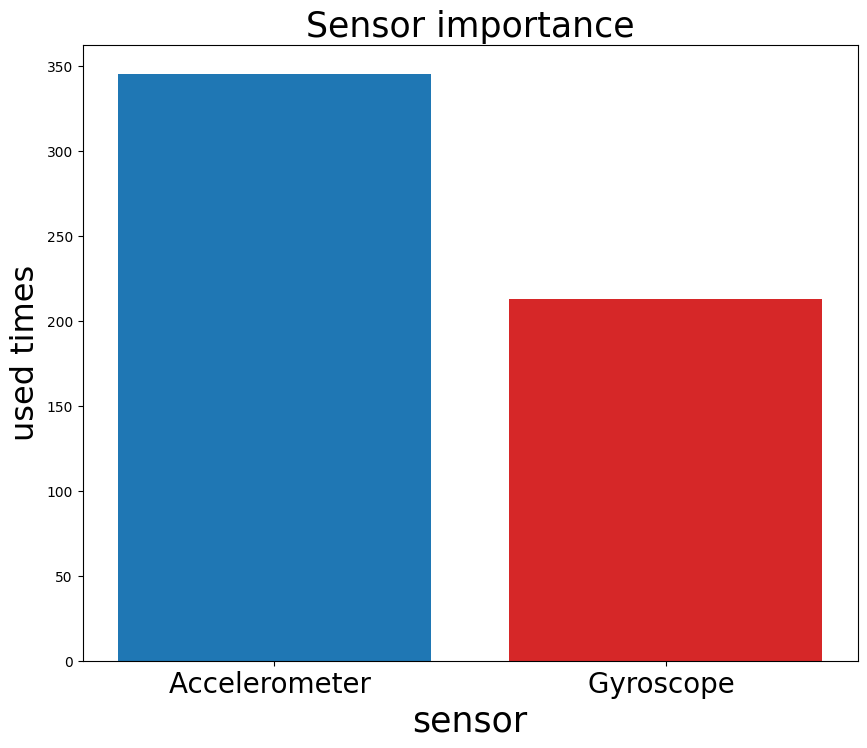

In [ ]:
Acc=0
Gyro=0
other=0
for i in train_data.columns:
    if'Acc'in i:
        Acc += 1
    elif'Gyro'in i:
        Gyro += 1
    else:
        other += 1

plt.figure(figsize=(10, 8))
plt.bar(x = ['Accelerometer ','Gyroscope '], height = [Acc,Gyro], color=['tab:blue', 'tab:red'])
plt.title("Sensor importance", fontsize = 25)
plt.xlabel("sensor", size=25)
plt.ylabel("used times", size=23)
plt.xticks(fontsize=20)
plt.show()

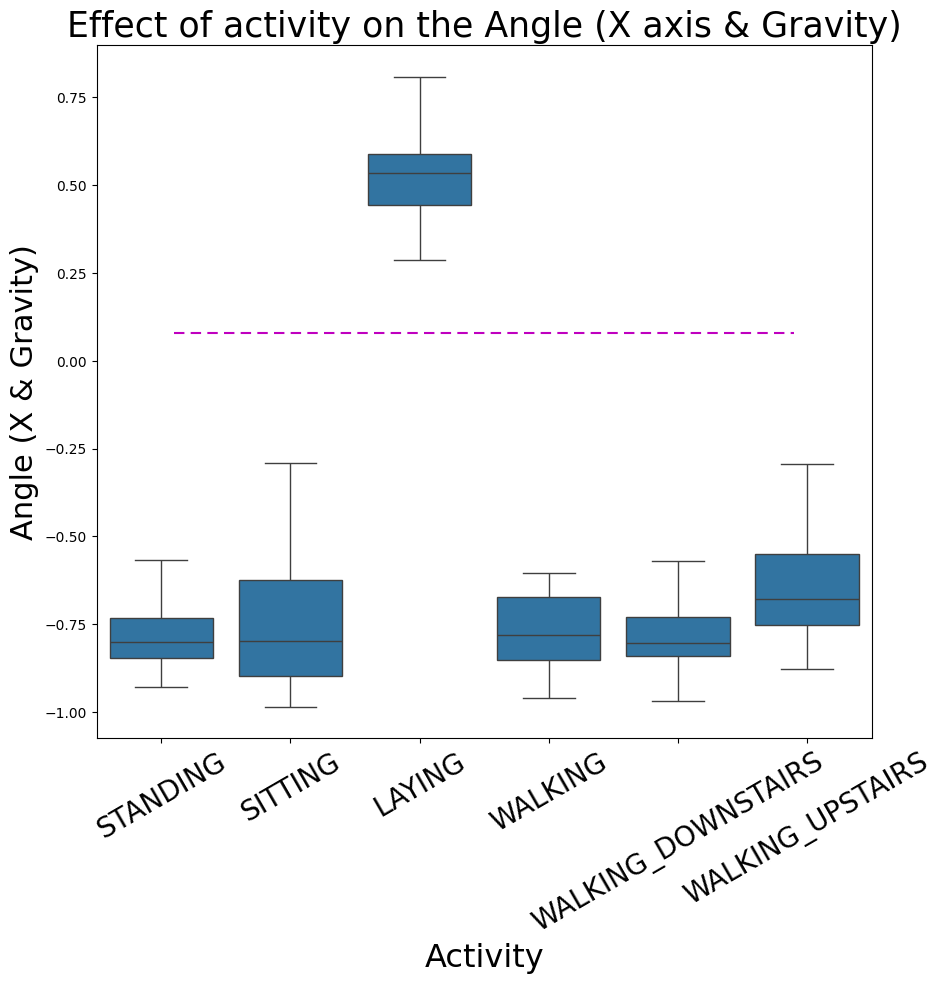

In [ ]:
plt.figure(figsize=(10,9))
sns.boxplot(x='Activity', y='angle(X,gravityMean)', data=train_data, showfliers=False)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Effect of activity on the Angle (X axis & Gravity)', fontsize=25)
plt.xlabel("Activity", size=23)
plt.ylabel('Angle (X & Gravity)', size=22)
plt.xticks(rotation = 30, fontsize = 20)
plt.show()

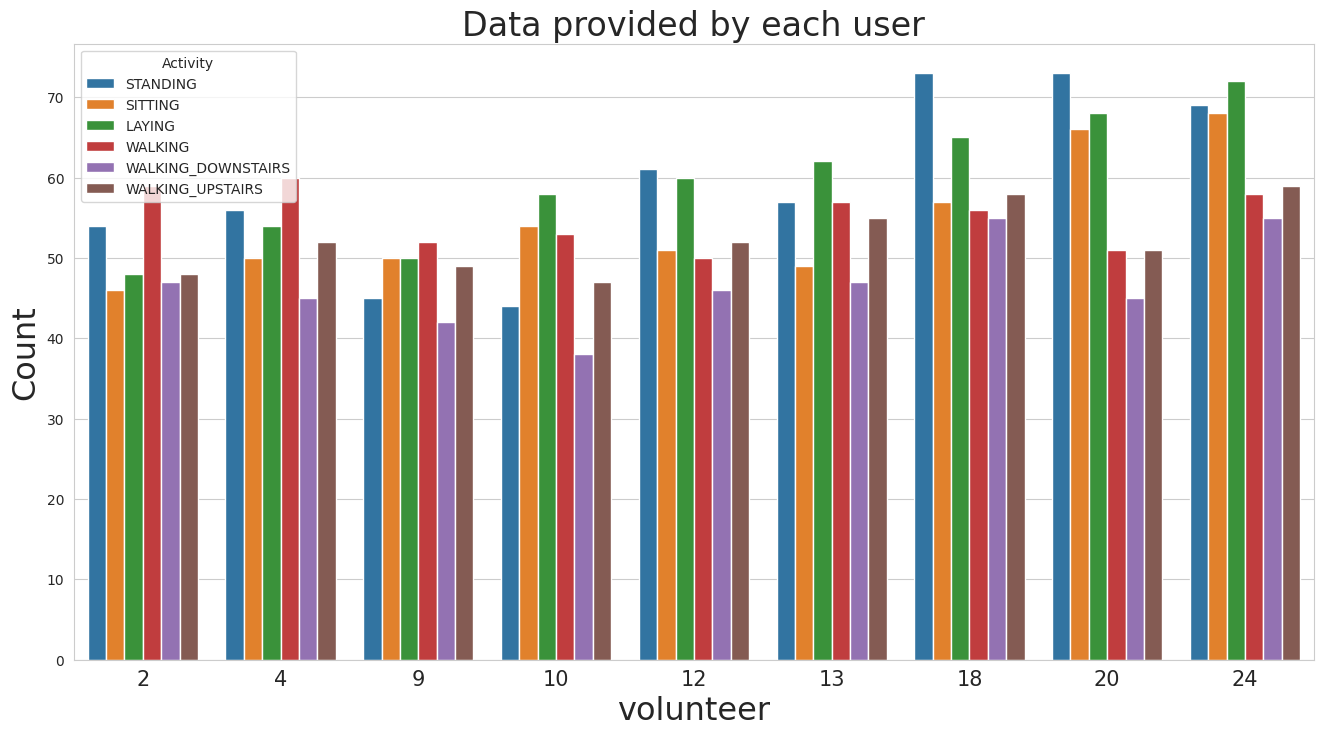

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
sns.color_palette("tab10")
plt.title('Data provided by each user', fontsize=24)
sns.countplot(x='subject',hue='Activity', data = train_data)
plt.xlabel("volunteer", size=23)
plt.ylabel("Count", size=23)
plt.xticks(size=15)
plt.show()

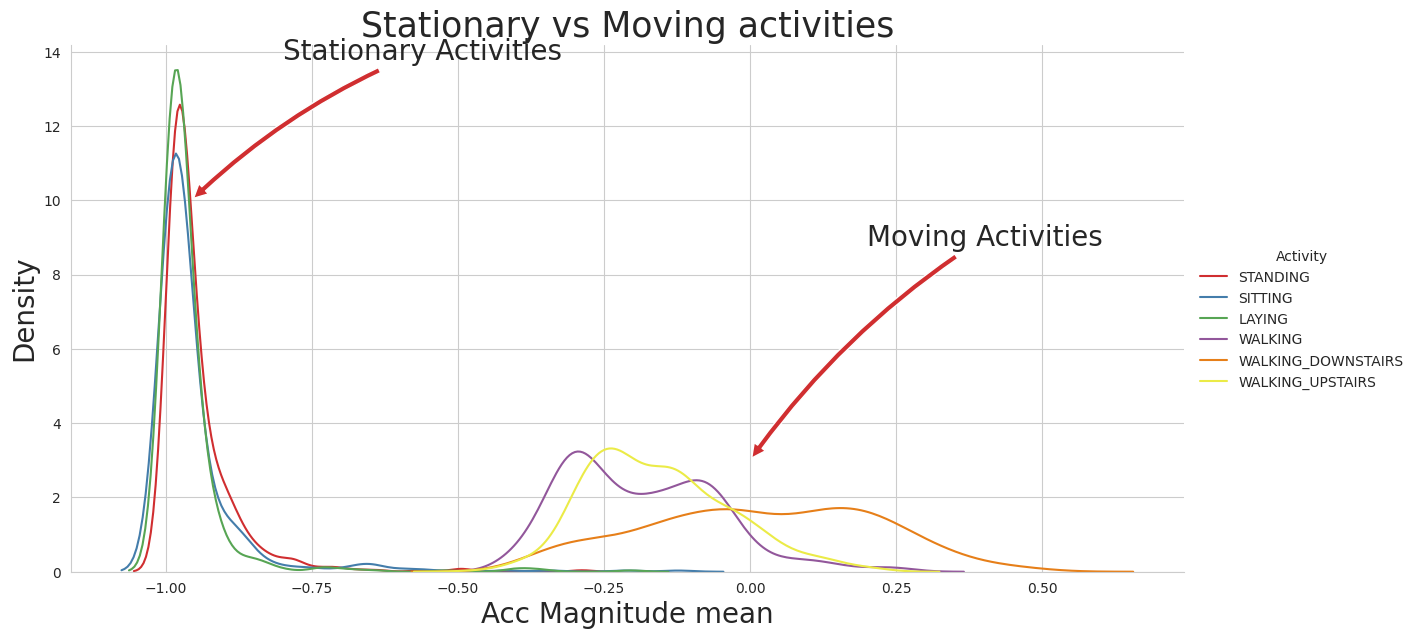

In [ ]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train_data, hue='Activity', height=6, aspect=2) # Replaced 'size' with 'height'
facetgrid.map(sns.distplot,'tBodyAccMag-mean()', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,10), xytext=(-0.8, 14), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.title('Stationary vs Moving activities', fontsize=25)
plt.xlabel("Acc Magnitude mean", size=20)
plt.ylabel('Density', size=20)
plt.show()

##  classifying activities into static  ❌ dynamic  

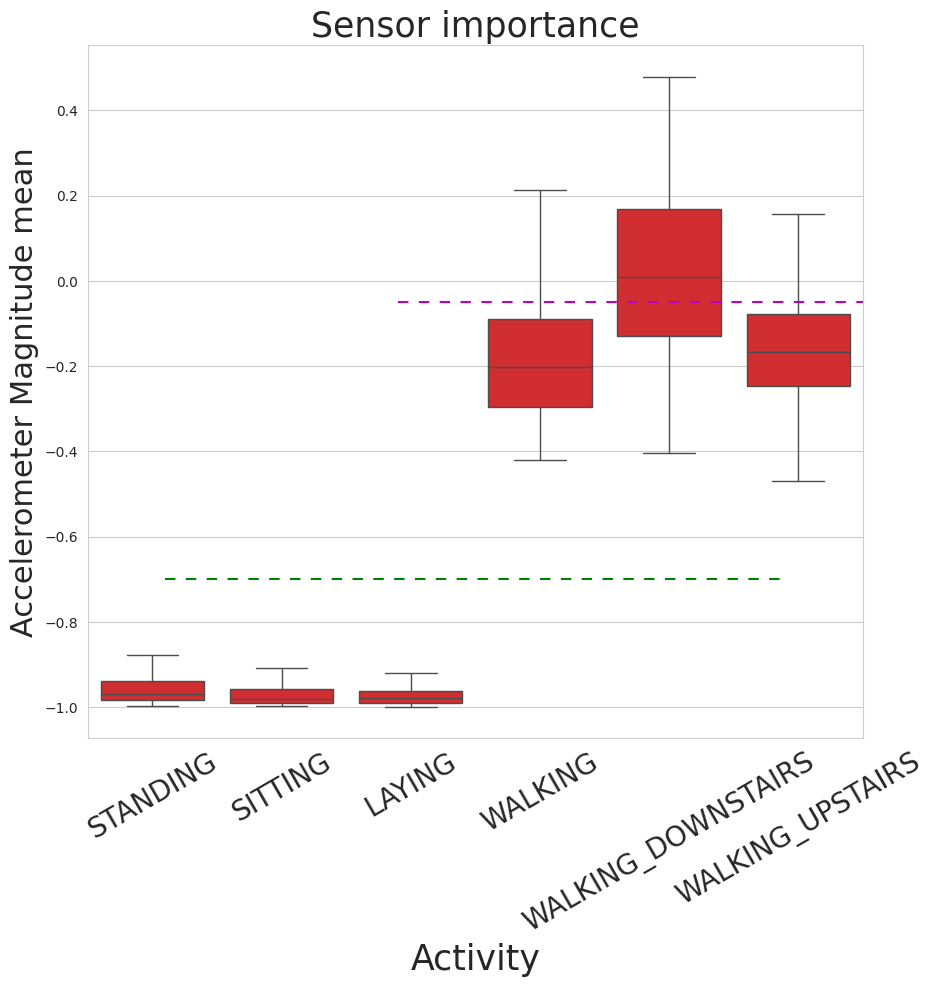

In [ ]:
plt.figure(figsize=(10,9))
sns.boxplot(x='Activity', y='tBodyAccMag-mean()',data=train_data, showfliers=False, saturation=1)
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.title("Sensor importance", fontsize = 25)
plt.xlabel("Activity", size=25)
plt.ylabel('Accelerometer Magnitude mean', size=22)
plt.xticks(rotation=30, fontsize=20)
plt.show()

## checking imbalance

In [ ]:
fig = px.pie(train_data, names='Activity',width=980)
fig.update_layout(
    title={
        'text': "Activities distribution in the data",
        'y':0.95,
        'x':0.40,
        'xanchor': 'center',
        'yanchor': 'top'},
         legend_title ="Activities",
         font=dict(
         family="Arial",
         size=18))
fig.show()

In [ ]:
columns = train_data.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train_data.columns = columns
test_data.columns = columns

In [ ]:
def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):

    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)

        # prepare the data for seaborn
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})

        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')

In [ ]:
data = pd.concat([train_data, test_data])
data = train_data.sample(frac=1)
f_df = data.loc[:, data.columns.str.contains('^f|^s|^a|^A')]
t_df = data.loc[:, data.columns.str.contains('^t|^s|^a|^A')]

X = data.drop(['subject', 'Activity'], axis=1)
y = data['Activity']

X_f = f_df.drop(['subject', 'Activity'], axis=1)
y_f = f_df['Activity']

X_t = t_df.drop(['subject', 'Activity'], axis=1)
y_t = t_df['Activity']


pca = PCA(n_components=0.99)
pca.fit(X)
x_reduced = pca.transform(X)

print('Frequency components number is {} Time components number is {}'.format(X_f.shape[1], X.shape[1] - X_f.shape[1]))
print('Original number of features {} Reduced number of features {}'.format(X.shape[1], x_reduced.shape[1]))

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_reduced, y, test_size=0.2, shuffle=True, random_state=42)
x_train_f, x_test_f, y_train_f, y_test_f = train_test_split(X_f, y_f, test_size=0.2, shuffle=True, random_state=42)
x_train_t, x_test_t, y_train_t, y_test_t = train_test_split(X_t, y_t, test_size=0.2, shuffle=True, random_state=42)

Frequency components number is 296 Time components number is 265
Original number of features 561 Reduced number of features 148


In [ ]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, label_binarize # Import necessary modules

kernal_evals = dict()

def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))

    train_precision = metrics.precision_score(y_train, model.predict(X_train), average='micro')
    test_precision = metrics.precision_score(y_test, model.predict(X_test), average='micro')

    train_recall = metrics.recall_score(y_train, model.predict(X_train), average='micro')
    test_recall = metrics.recall_score(y_test, model.predict(X_test), average='micro')

    # Store evaluations
    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall]

    print(f"\nModel: {name}\n")
    print(f"Training Accuracy: {train_accuracy*100:.2f}%  Test Accuracy: {test_accuracy*100:.2f}%")
    print(f"Training Precision: {train_precision*100:.2f}%  Test Precision: {test_precision*100:.2f}%")
    print(f"Training Recall: {train_recall*100:.2f}%  Test Recall: {test_recall*100:.2f}%")

    # Classification Report
    print("\nClassification Report:\n")
    # Ensure y_test is a numpy array for consistent indexing
    y_test_np = np.asarray(y_test)
    y_train_np = np.asarray(y_train)

    # Need to get unique class names for the report. Assuming y_test contains original labels or can be decoded
    # If y_test is already encoded, use the LabelEncoder that fitted the data.
    # For robustness, let's assume y_test might be string labels and encode it if necessary
    if isinstance(y_test_np[0], (str, np.str_)):
        le = LabelEncoder()
        # Fit on unique values from both train and test to be safe
        all_labels = np.unique(np.concatenate((y_train_np, y_test_np)))
        le.fit(all_labels)
        y_test_encoded_for_report = le.transform(y_test_np)
        target_names = le.classes_
    else:
        # If y_test is already integer encoded, assume classes are 0 to n_classes-1
        # And generate target names based on the unique values
        unique_labels = np.unique(y_test_np)
        target_names = [str(label) for label in unique_labels]
        y_test_encoded_for_report = y_test_np

    print(classification_report(y_test_encoded_for_report, model.predict(X_test), target_names=target_names))


    # Confusion Matrix
    actual = y_test_np # Use the numpy array version
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)

    # Use the target_names from the classification report for display labels
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = target_names)

    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(False) # Turn off grid for confusion matrix plot
    cm_display.plot(ax=ax)
    plt.title(f"Confusion Matrix: {name}") # Add title to confusion matrix
    plt.show() # Display the confusion matrix plot

    # ROC AUC Score (for multi-class)
    # This part needs y_test to be binarized and model to have predict_proba or decision_function
    # Check if the model has predict_proba or decision_function
    if len(np.unique(y_test_np)) > 2: # Use y_test_np
        try:
            # Ensure y_test is integer encoded before binarization for roc_auc_score
            if isinstance(y_test_np[0], (str, np.str_)):
                 le = LabelEncoder()
                 # Fit on unique values from both train and test to be safe
                 all_labels = np.unique(np.concatenate((y_train_np, y_test_np)))
                 le.fit(all_labels)
                 y_test_encoded_for_roc = le.transform(y_test_np)
            else:
                 y_test_encoded_for_roc = y_test_np

            y_test_bin = label_binarize(y_test_encoded_for_roc, classes=np.unique(y_test_encoded_for_roc))
            if hasattr(model, 'predict_proba'):
                y_score = model.predict_proba(X_test)
            elif hasattr(model, 'decision_function'):
                 y_score = model.decision_function(X_test)
            else:
                raise AttributeError("Model does not have predict_proba or decision_function")

            roc_auc = roc_auc_score(y_test_bin, y_score, multi_class='ovr')
            print(f"\nROC AUC Score (Multi-class): {roc_auc:.4f}")
        except Exception as e:
            print(f"\nCould not compute ROC AUC score for multi-class: {e}")
    elif len(np.unique(y_test_np)) <= 2: # Use y_test_np
         # Handle binary case if needed, though the dataset is multi-class
         pass # Currently focusing on multi-class
    else:
        print("\nModel does not have predict_proba or decision_function for ROC AUC calculation.")

Training Accuracy Logistic Regression 99.61815867628341  Test Accuracy Logistic Regression 98.13559322033898
Training Precesion Logistic Regression 99.61815867628341  Test Precesion Logistic Regression 98.13559322033898
Training Recall Logistic Regression 99.61815867628341  Test Recall Logistic Regression 98.13559322033898


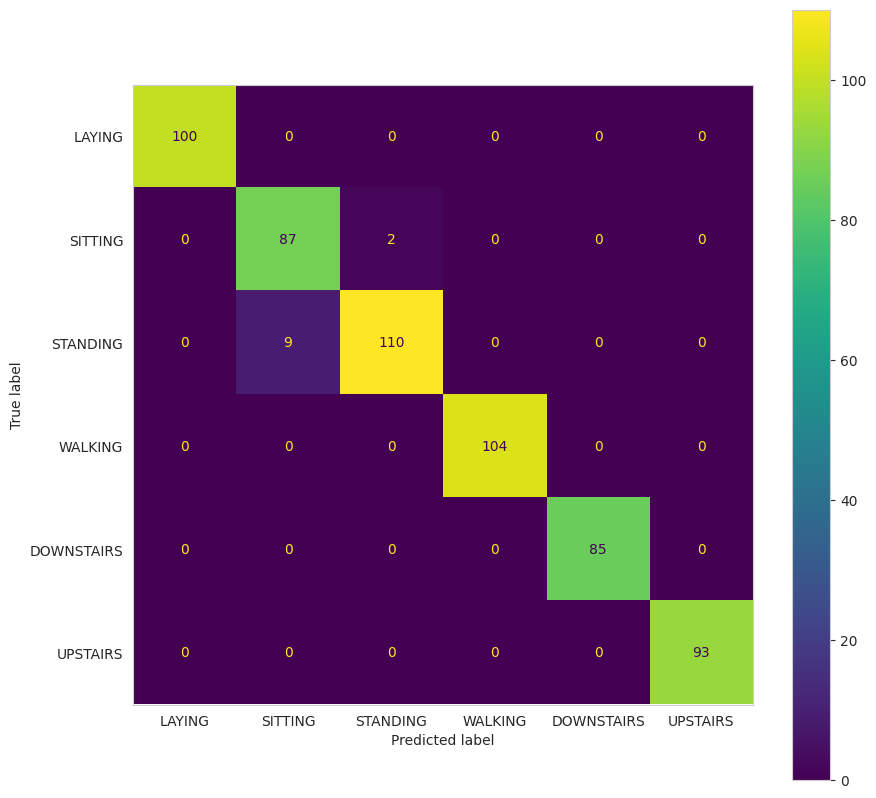

In [ ]:
lr = LogisticRegression().fit(x_train, y_train)
evaluate_classification(lr, "Logistic Regression", x_train, x_test, y_train, y_test)

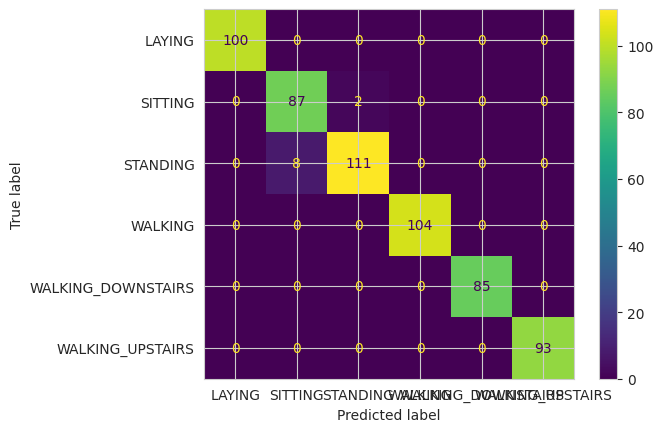

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import numpy as np  # Import numpy for unique


# Assuming X and y are your features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

# Define activity_labels by getting the unique values from the target variable
activity_labels = np.unique(y)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=activity_labels)
disp.plot(cmap='viridis')

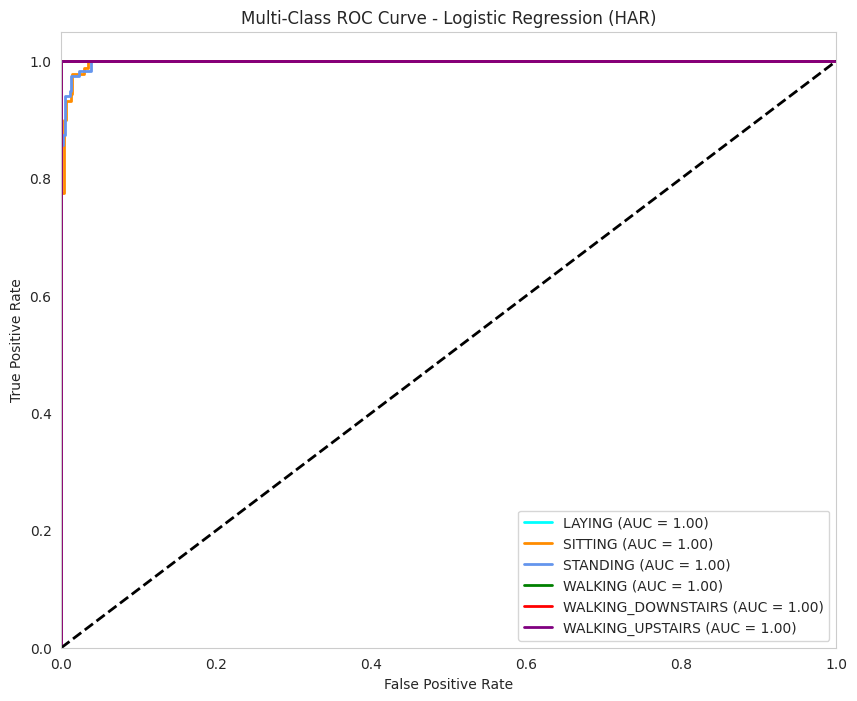

In [ ]:
plt.figure(figsize=(10, 8))
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple']
activity_labels = ['Walking', 'Walking Upstairs', 'Walking Downstairs', 'Sitting', 'Standing', 'Laying']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{activity_labels[i]} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve - Logistic Regression (HAR)')
plt.legend(loc="lower right")
plt.grid()
plt.show()


Training Accuracy LinearDiscriminantAnalysis 99.44845142129826  Test Accuracy LinearDiscriminantAnalysis 98.98305084745763
Training Precesion LinearDiscriminantAnalysis 99.44845142129826  Test Precesion LinearDiscriminantAnalysis 98.98305084745763
Training Recall LinearDiscriminantAnalysis 99.44845142129826  Test Recall LinearDiscriminantAnalysis 98.98305084745763


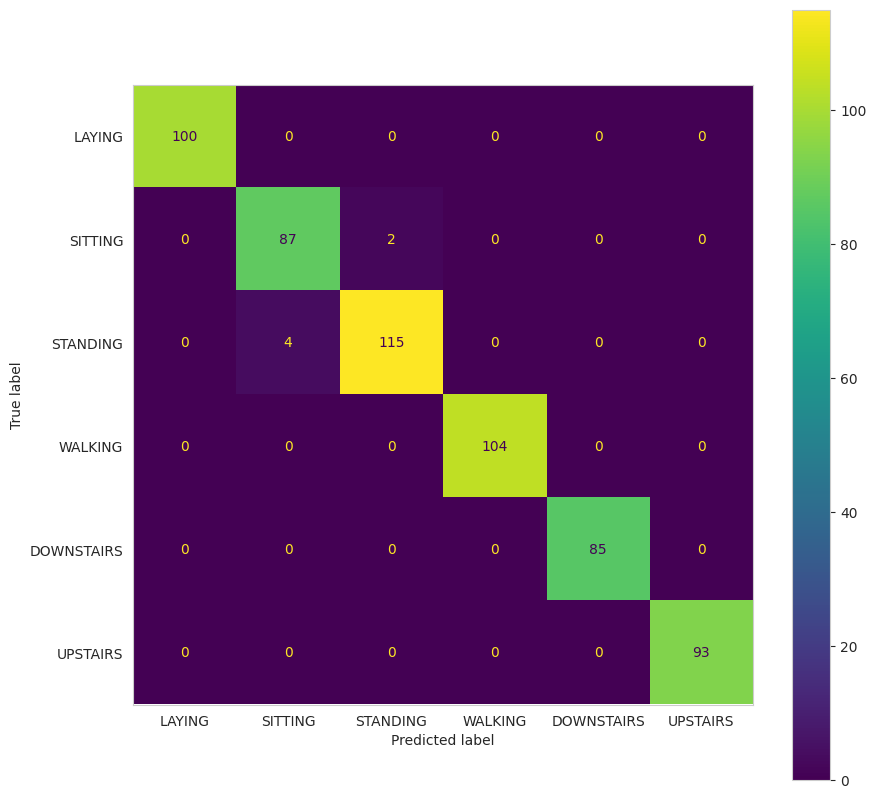

In [ ]:
lda = LinearDiscriminantAnalysis().fit(x_train, y_train)
evaluate_classification(lda, "LinearDiscriminantAnalysis", x_train, x_test, y_train, y_test)

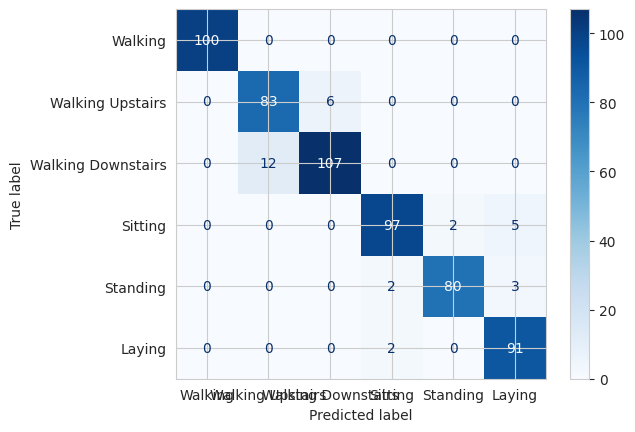

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Assume X and y are your features and labels (y = encoded as 0-5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(max_depth=20, random_state=42)  # adjust depth to avoid overfitting
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Walking', 'Walking Upstairs', 'Walking Downstairs', 'Sitting', 'Standing', 'Laying'])
disp.plot(cmap='Blues')


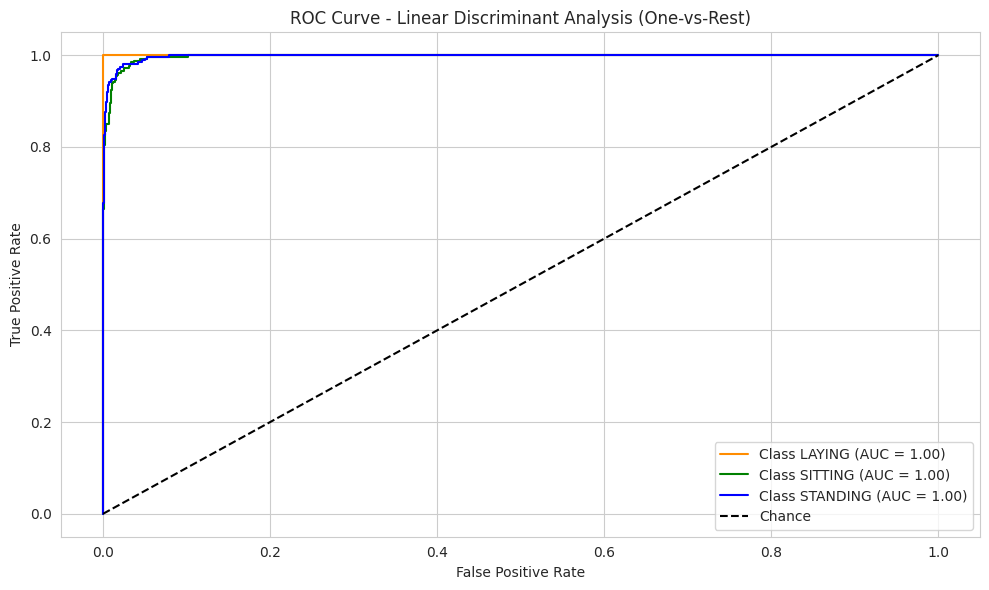

Macro-average AUC Score: 1.00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.multiclass import OneVsRestClassifier

#  Load your dataset
# train = pd.read_csv("train.csv")  # Replace with your file name - This line caused the error
# Load the train data from the correct path in Google Drive
train = pd.read_csv("/content/drive/MyDrive/train.csv")

X = train.drop(['Activity', 'subject'], axis=1, errors='ignore')
y = train['Activity']

#  Encode and binarize the target
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_binarized = label_binarize(y_encoded, classes=np.unique(y_encoded))
n_classes = y_binarized.shape[1]

#  Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y_binarized, test_size=0.2, random_state=42)

#  Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Train Linear Discriminant Analysis with One-vs-Rest
lda = OneVsRestClassifier(LinearDiscriminantAnalysis())
lda.fit(X_train_scaled, y_train)

#  Predict probabilities
y_score = lda.predict_proba(X_test_scaled)

#  Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#  Plot ROC Curve for the first 3 classes (for visibility)
plt.figure(figsize=(10, 6))
colors = ['darkorange', 'green', 'blue']
for i, color in zip(range(min(3, n_classes)), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label=f"Class {le.classes_[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Linear Discriminant Analysis (One-vs-Rest)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# Print Macro Average AUC
macro_auc = roc_auc_score(y_test, y_score, average='macro')
print(f"Macro-average AUC Score: {macro_auc:.2f}")

Training Accuracy KNeighborsClassifier 95.35793232443463  Test Accuracy KNeighborsClassifier 94.96940856560163
Training Precesion KNeighborsClassifier 95.35793232443463  Test Precesion KNeighborsClassifier 94.96940856560163
Training Recall KNeighborsClassifier 95.35793232443463  Test Recall KNeighborsClassifier 94.96940856560163


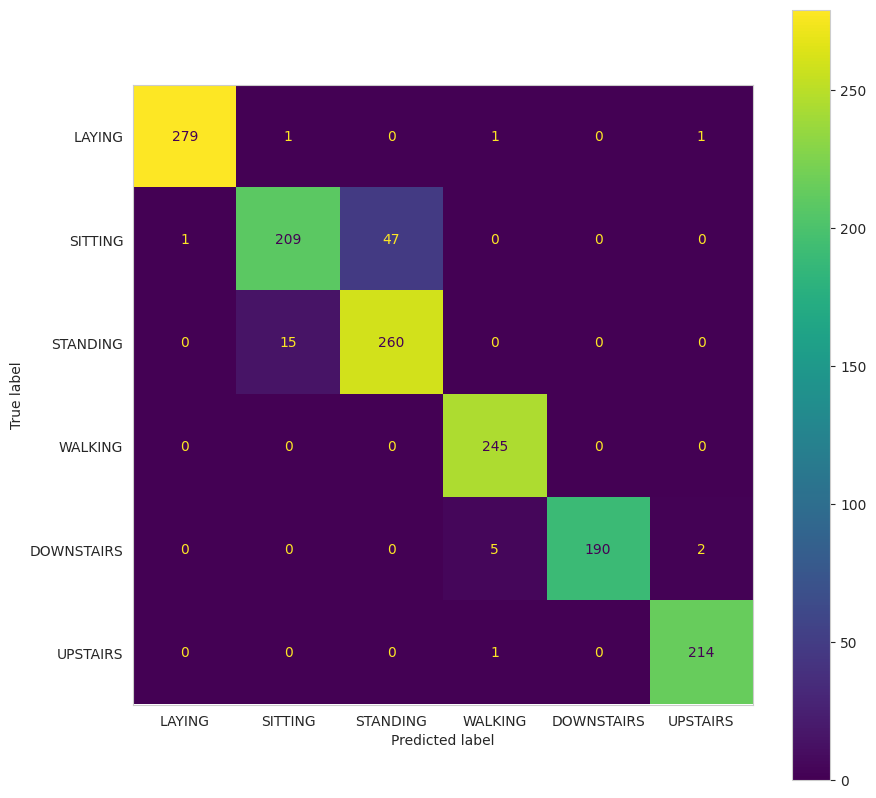

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Ensure X and y are defined
# X = features, y = labels

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

knn = KNeighborsClassifier(n_neighbors=30).fit(x_train, y_train)
evaluate_classification(knn, "KNeighborsClassifier", x_train, x_test, y_train, y_test)


<Figure size 1000x600 with 0 Axes>

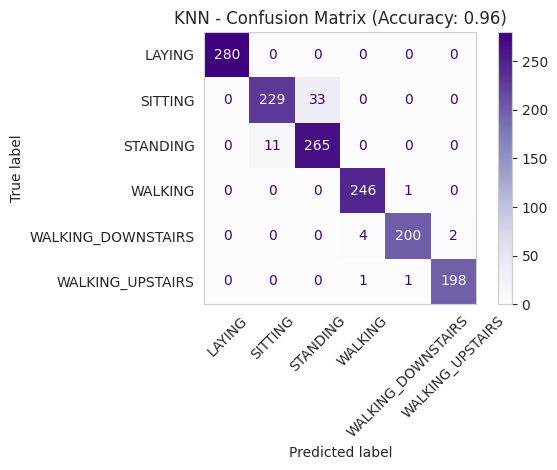

Classification Report:

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       280
           SITTING       0.95      0.87      0.91       262
          STANDING       0.89      0.96      0.92       276
           WALKING       0.98      1.00      0.99       247
WALKING_DOWNSTAIRS       0.99      0.97      0.98       206
  WALKING_UPSTAIRS       0.99      0.99      0.99       200

          accuracy                           0.96      1471
         macro avg       0.97      0.97      0.97      1471
      weighted avg       0.96      0.96      0.96      1471



In [ ]:
# Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

#  Load your dataset
# Replace 'train.csv' with your actual dataset
# train = pd.read_csv("train.csv")  # Make sure the file is in your environment
# Load the train data from the correct path in Google Drive
train = pd.read_csv("/content/drive/MyDrive/train.csv")

#  Features and Target
X = train.drop(['Activity', 'subject'], axis=1, errors='ignore')  # drop 'subject' if it exists
y = train['Activity']

#  Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

#  Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

#  Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

#  Predict
y_pred = knn.predict(X_test_scaled)

# Confusion Matrix and Accuracy
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

#  Plot Confusion Matrix
plt.figure(figsize=(10, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Purples', xticks_rotation=45)
plt.title(f"KNN - Confusion Matrix (Accuracy: {accuracy:.2f})")
plt.grid(False)
plt.tight_layout()
plt.show()

#  Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

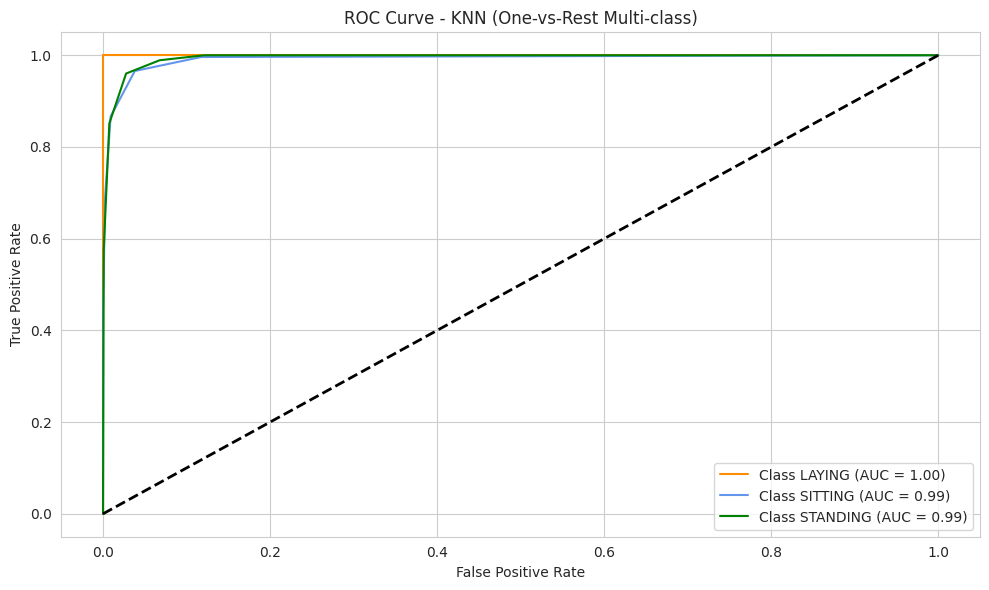

Macro-average AUC Score for KNN: 1.00


In [ ]:
# Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Load your dataset
# train = pd.read_csv("train.csv")  # Replace with your actual filename
# Load the train data from the correct path in Google Drive
train = pd.read_csv("/content/drive/MyDrive/train.csv")

X = train.drop(['Activity', 'subject'], axis=1, errors='ignore')
y = train['Activity']

# Encode and Binarize the Target
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_binary = label_binarize(y_encoded, classes=np.unique(y_encoded))
n_classes = y_binary.shape[1]

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN Model (One-vs-Rest for multi-class)
knn = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5))
knn.fit(X_train_scaled, y_train)

# Predict probabilities
y_score = knn.predict_proba(X_test_scaled)

# Compute ROC Curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curves for first 3 classes (for clarity)
plt.figure(figsize=(10, 6))
colors = ['darkorange', 'cornflowerblue', 'green']
for i, color in zip(range(min(3, n_classes)), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label=f'Class {le.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN (One-vs-Rest Multi-class)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# Macro-Average AUC
macro_auc = roc_auc_score(y_test, y_score, average="macro")
print(f"Macro-average AUC Score for KNN: {macro_auc:.2f}")

Training Accuracy GaussianNB 19.70753273252848  Test Accuracy GaussianNB 15.83956492182189
Training Precesion GaussianNB 19.70753273252848  Test Precesion GaussianNB 15.83956492182189
Training Recall GaussianNB 19.70753273252848  Test Recall GaussianNB 15.83956492182189


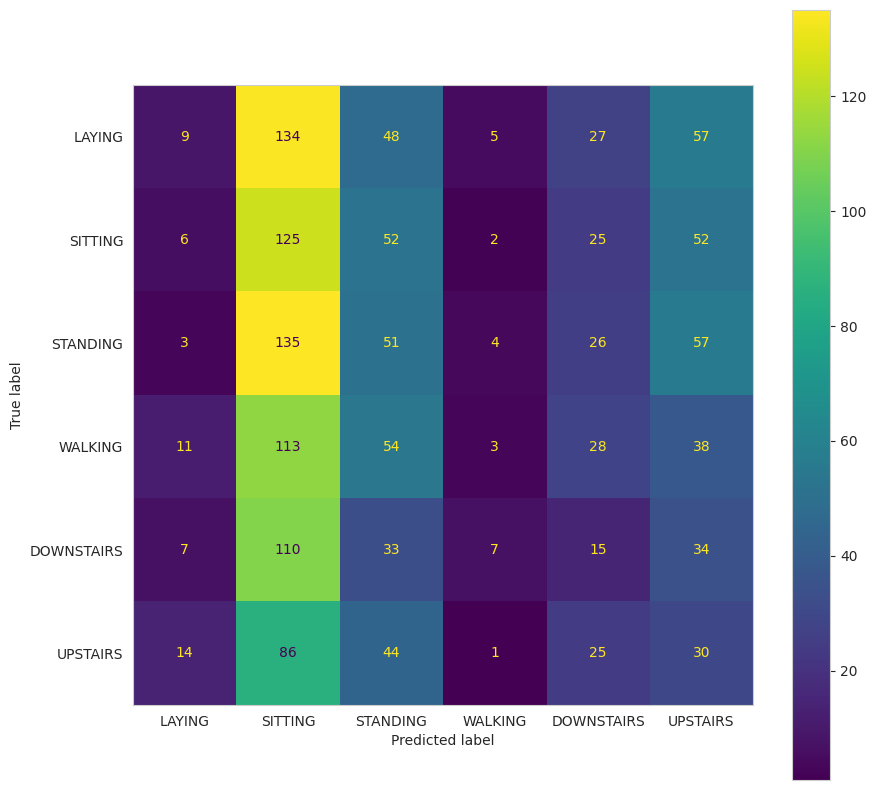

In [ ]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# If y_train and y_test are one-hot encoded, convert to class labels (1D array)
y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Train Gaussian Naive Bayes model
gnb = GaussianNB().fit(x_train, y_train_labels)

# Evaluate
evaluate_classification(gnb, "GaussianNB", x_train, x_test, y_train_labels, y_test_labels)


<Figure size 1000x600 with 0 Axes>

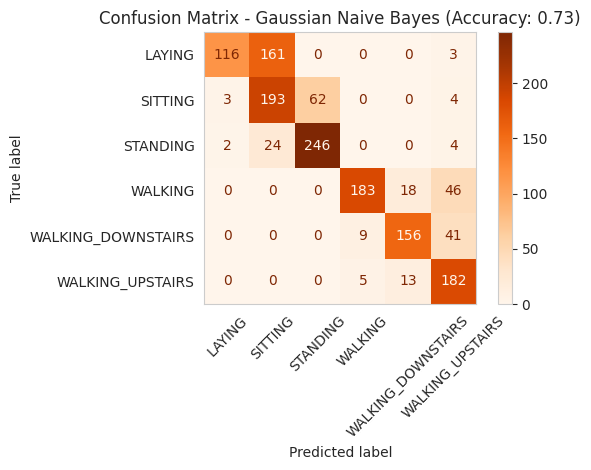

Classification Report:

                    precision    recall  f1-score   support

            LAYING       0.96      0.41      0.58       280
           SITTING       0.51      0.74      0.60       262
          STANDING       0.80      0.89      0.84       276
           WALKING       0.93      0.74      0.82       247
WALKING_DOWNSTAIRS       0.83      0.76      0.79       206
  WALKING_UPSTAIRS       0.65      0.91      0.76       200

          accuracy                           0.73      1471
         macro avg       0.78      0.74      0.73      1471
      weighted avg       0.78      0.73      0.73      1471



In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

# Load your dataset
# Replace 'train.csv' with your actual file
# train = pd.read_csv("train.csv") # This line caused the error
# Load the train data from the correct path in Google Drive
train = pd.read_csv("/content/drive/MyDrive/train.csv")

# Separate features and target
X = train.drop(['Activity', 'subject'], axis=1, errors='ignore')  # Drop 'subject' if it exists
y = train['Activity']

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

# Predict
y_pred = gnb.predict(X_test_scaled)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Display Confusion Matrix
plt.figure(figsize=(10, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Oranges', xticks_rotation=45)
plt.title(f"Confusion Matrix - Gaussian Naive Bayes (Accuracy: {accuracy:.2f})")
plt.grid(False)
plt.tight_layout()
plt.show()

# Print Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

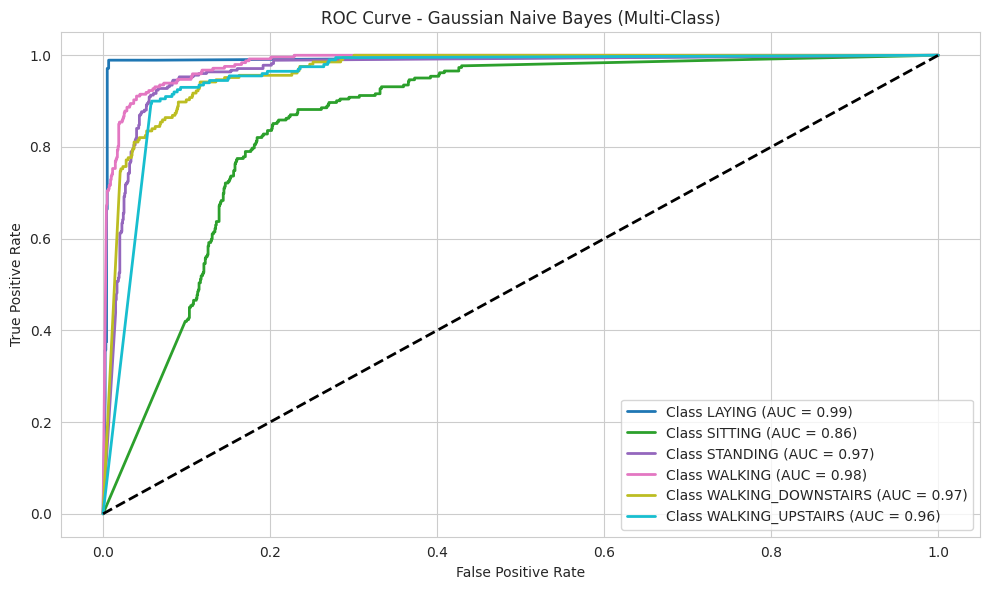

Macro-average AUC Score: 0.95


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Load dataset
# train = pd.read_csv("train.csv")  # Update with your filename - This line caused the error
# Load the train data from the correct path in Google Drive
train = pd.read_csv("/content/drive/MyDrive/train.csv")

X = train.drop(['Activity', 'subject'], axis=1, errors='ignore')
y = train['Activity']

# Encode and binarize target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
# y_binary = label_binarize(y_encoded, classes=np.unique(y_encoded)) # No longer needed for GNB directly
n_classes = len(np.unique(y_encoded)) # Define n_classes based on unique encoded labels

# Split data
# Split using the original features X and the encoded target y_encoded
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Gaussian Naive Bayes
gnb = GaussianNB()
# Fit GNB with the 1-dimensional encoded target variable y_train
gnb.fit(X_train_scaled, y_train)

# Predict probabilities
# For ROC curve, we need predicted probabilities. GaussianNB has predict_proba.
y_score = gnb.predict_proba(X_test_scaled)

# Compute ROC curves and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# For multi-class ROC with predict_proba, y_test needs to be binarized for roc_curve
y_test_binary = label_binarize(y_test, classes=np.unique(y_encoded))


for i in range(n_classes):
    # Compute ROC curve for each class against all others
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve for first 3 classes for readability (or all if desired)
plt.figure(figsize=(10, 6))
# Ensure colors list is long enough for n_classes if plotting all
colors = plt.cm.get_cmap('tab10', n_classes) # Use a colormap for more classes

for i in range(n_classes): # Iterate through all classes
    plt.plot(fpr[i], tpr[i], color=colors(i), lw=2,
             label=f"Class {le.classes_[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title("ROC Curve - Gaussian Naive Bayes (Multi-Class)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# Print macro-average AUC
# roc_auc_score requires y_true to be in binary format for 'macro' average
macro_auc = roc_auc_score(y_test_binary, y_score, average="macro")
print(f"Macro-average AUC Score: {macro_auc:.2f}")

Training Accuracy Linear SVC(LBasedImpl) 34.14385308620983  Test Accuracy Linear SVC(LBasedImpl) 17.33514615907546
Training Precesion Linear SVC(LBasedImpl) 34.14385308620983  Test Precesion Linear SVC(LBasedImpl) 17.33514615907546
Training Recall Linear SVC(LBasedImpl) 34.14385308620983  Test Recall Linear SVC(LBasedImpl) 17.33514615907546


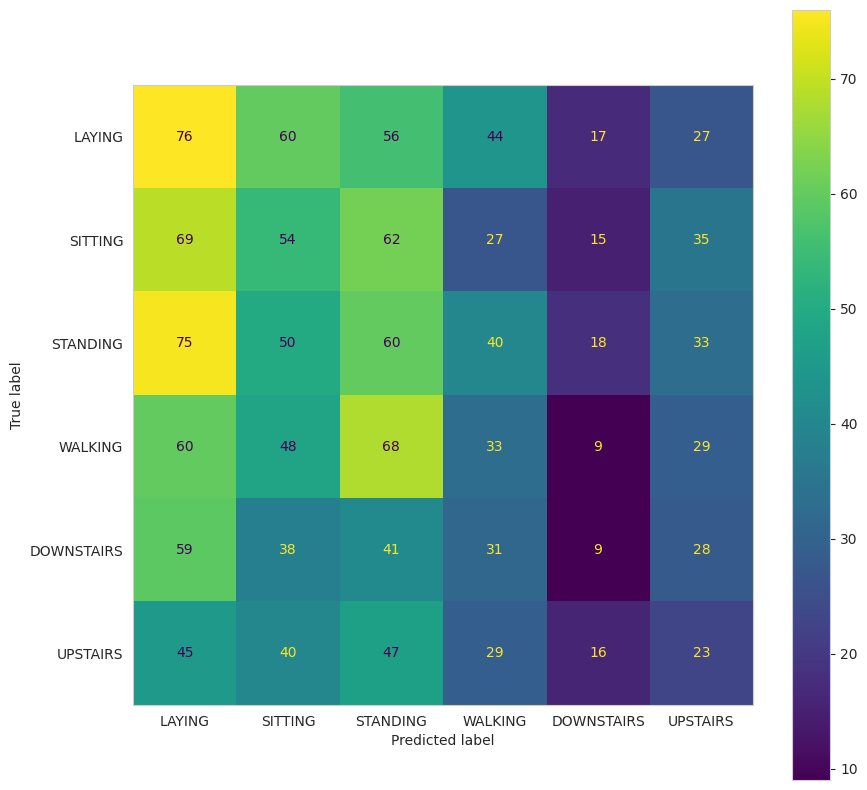

In [ ]:
lin_svc = svm.LinearSVC().fit(x_train, y_train)
evaluate_classification(lin_svc, "Linear SVC(LBasedImpl)", x_train, x_test, y_train, y_test)

<Figure size 1000x600 with 0 Axes>

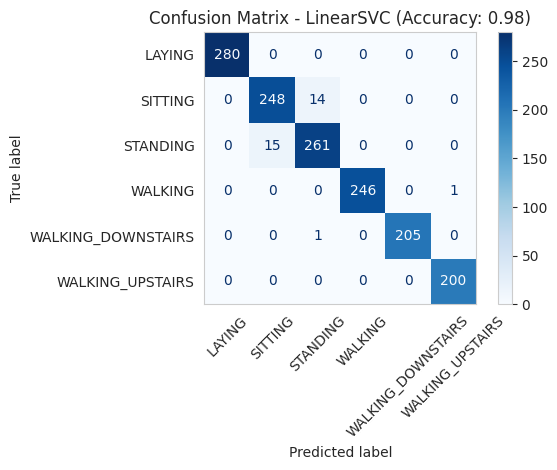

Classification Report:

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       280
           SITTING       0.94      0.95      0.94       262
          STANDING       0.95      0.95      0.95       276
           WALKING       1.00      1.00      1.00       247
WALKING_DOWNSTAIRS       1.00      1.00      1.00       206
  WALKING_UPSTAIRS       1.00      1.00      1.00       200

          accuracy                           0.98      1471
         macro avg       0.98      0.98      0.98      1471
      weighted avg       0.98      0.98      0.98      1471



In [ ]:
#  Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

# Load your dataset
# Replace 'train.csv' with your actual dataset filename
# The error occurs because the file is not found in the current directory.
# Load the train data from the correct path in Google Drive
train = pd.read_csv("/content/drive/MyDrive/train.csv")

#  Define features and target
X = train.drop(['Activity', 'subject'], axis=1, errors='ignore')  # Drop 'subject' if it exists
y = train['Activity']

# Encode the target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

#  Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale the feature values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Train a Linear Support Vector Classifier
# Increased max_iter to help convergence for LinearSVC
model = LinearSVC(max_iter=10000)
model.fit(X_train_scaled, y_train)

#  Make predictions
y_pred = model.predict(X_test_scaled)

#  Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

#  Display the confusion matrix
plt.figure(figsize=(10, 6))
# Use the original y_test for confusion matrix display labels from the LabelEncoder
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title(f"Confusion Matrix - LinearSVC (Accuracy: {accuracy:.2f})")
plt.grid(False)
plt.tight_layout()
plt.show()

#  Show classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

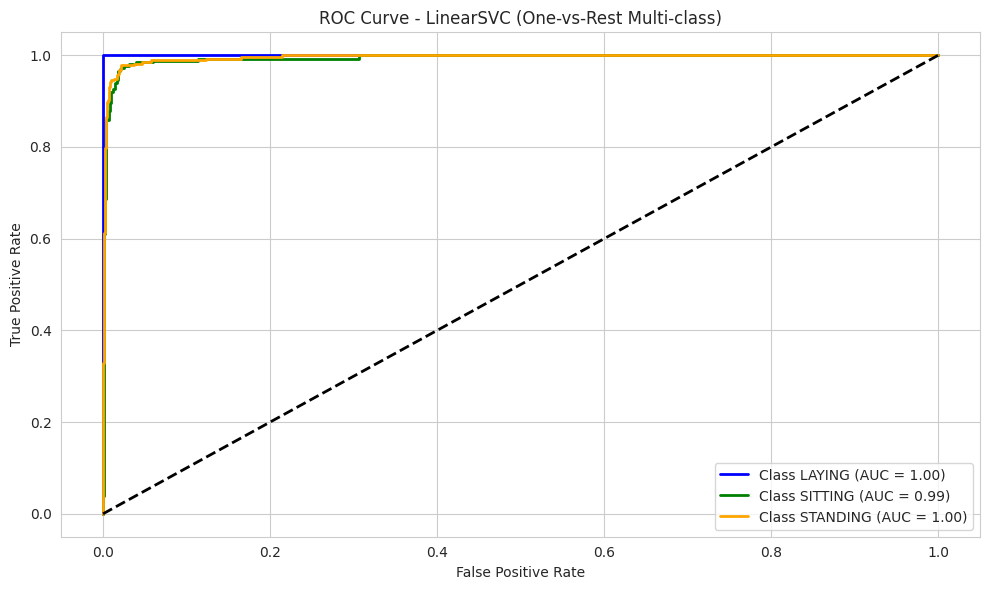

Macro-average AUC Score: 1.00


In [ ]:
#  Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score

#  Load dataset
# train = pd.read_csv("train.csv")  # Replace with your actual file name
# Load the train data from the correct path in Google Drive
train = pd.read_csv("/content/drive/MyDrive/train.csv")

X = train.drop(['Activity', 'subject'], axis=1, errors='ignore')
y = train['Activity']

# Label encoding and one-hot binarization for multiclass ROC
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_binary = label_binarize(y_encoded, classes=np.unique(y_encoded))
n_classes = y_binary.shape[1]

#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

#  Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Train LinearSVC using One-vs-Rest
svc = OneVsRestClassifier(LinearSVC(max_iter=10000))
svc.fit(X_train_scaled, y_train)

# Get decision scores instead of probabilities
y_score = svc.decision_function(X_test_scaled)

#  Compute ROC curve and ROC AUC for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve for first 3 classes (for clarity)
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'orange']
for i, color in zip(range(min(3, n_classes)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {le.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title("ROC Curve - LinearSVC (One-vs-Rest Multi-class)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Macro-average AUC
macro_auc = roc_auc_score(y_test, y_score, average="macro")
print(f"Macro-average AUC Score: {macro_auc:.2f}")

In [ ]:
import numpy as np

# Convert one-hot encoded y_train and y_test to 1D label format
y_train_single = np.argmax(y_train, axis=1)
y_test_single = np.argmax(y_test, axis=1)

# Fit the model
rbf = svm.SVC(kernel='rbf', probability=True).fit(x_train, y_train_single)

# Evaluate the model
evaluate_classification(rbf, "RBF SVC", x_train, x_test, y_train_single, y_test_single)



Model: RBF SVC

Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.64      0.31       280
           1       0.18      0.06      0.10       262
           2       0.18      0.32      0.23       276
           3       0.14      0.00      0.01       247
           4       0.00      0.00      0.00       206
           5       0.00      0.00      0.00       200

    accuracy                           0.19      1471
   macro avg       0.12      0.17      0.11      1471
weighted avg       0.13      0.19      0.12      1471


Confusion Matrix:
[[180  20  77   3   0   0]
 [149  17  94   2   0   0]
 [175  14  87   0   0   0]
 [149  16  81   1   0   0]
 [131  12  62   1   0   0]
 [110  14  76   0   0   0]]

ROC AUC Score (Multi-class): 0.4936


<Figure size 1000x600 with 0 Axes>

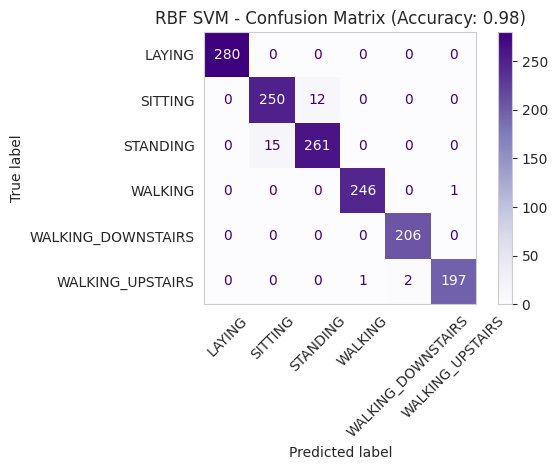

Classification Report:

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       280
           SITTING       0.94      0.95      0.95       262
          STANDING       0.96      0.95      0.95       276
           WALKING       1.00      1.00      1.00       247
WALKING_DOWNSTAIRS       0.99      1.00      1.00       206
  WALKING_UPSTAIRS       0.99      0.98      0.99       200

          accuracy                           0.98      1471
         macro avg       0.98      0.98      0.98      1471
      weighted avg       0.98      0.98      0.98      1471



In [ ]:
#  Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

# Load your dataset
# Replace 'train.csv' with your actual file if needed
train = pd.read_csv("train.csv")

# Prepare features and target
X = train.drop(['Activity', 'subject'], axis=1, errors='ignore')  # Drop subject if it exists
y = train['Activity']

#  Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

#  Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

#  Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Train RBF SVM model
rbf_svc = SVC(kernel='rbf')
rbf_svc.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = rbf_svc.predict(X_test_scaled)

#  Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

#  Plot Confusion Matrix
plt.figure(figsize=(10, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Purples', xticks_rotation=45)
plt.title(f"RBF SVM - Confusion Matrix (Accuracy: {accuracy:.2f})")
plt.grid(False)
plt.tight_layout()
plt.show()

#  Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))


<Figure size 1000x600 with 0 Axes>

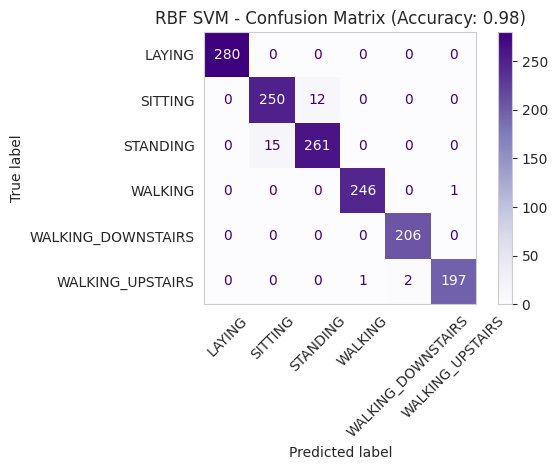

Classification Report:

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       280
           SITTING       0.94      0.95      0.95       262
          STANDING       0.96      0.95      0.95       276
           WALKING       1.00      1.00      1.00       247
WALKING_DOWNSTAIRS       0.99      1.00      1.00       206
  WALKING_UPSTAIRS       0.99      0.98      0.99       200

          accuracy                           0.98      1471
         macro avg       0.98      0.98      0.98      1471
      weighted avg       0.98      0.98      0.98      1471



In [ ]:
#  Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

#  Load your dataset
# Replace 'train.csv' with your actual file if needed
# The error occurs because the file is not found in the current directory.
# Load the train data from the correct path in Google Drive
train = pd.read_csv("/content/drive/MyDrive/train.csv")

#  Prepare features and target
X = train.drop(['Activity', 'subject'], axis=1, errors='ignore')  # Drop subject if it exists
y = train['Activity']

#  Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

#  Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

#  Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train RBF SVM model
rbf_svc = SVC(kernel='rbf')
rbf_svc.fit(X_train_scaled, y_train)

#  Predict on test data
y_pred = rbf_svc.predict(X_test_scaled)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(10, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Purples', xticks_rotation=45)
plt.title(f"RBF SVM - Confusion Matrix (Accuracy: {accuracy:.2f})")
plt.grid(False)
plt.tight_layout()
plt.show()

#  Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

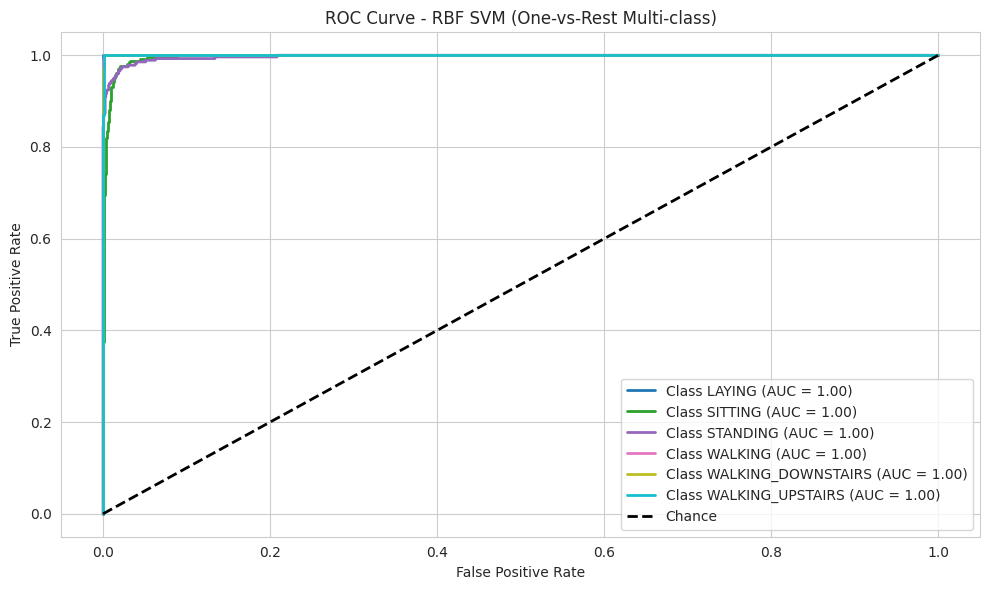

Macro-average AUC Score: 1.00


In [ ]:
#  Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score

#  Load Dataset
# train = pd.read_csv("train.csv")  # Replace with your dataset file name
# Load the train data from the correct path in Google Drive
train = pd.read_csv("/content/drive/MyDrive/train.csv") # Corrected file path

X = train.drop(['Activity', 'subject'], axis=1, errors='ignore')
y = train['Activity']

#  Encode Labels and Binarize for ROC Curve
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_binary = label_binarize(y_encoded, classes=np.unique(y_encoded))
n_classes = y_binary.shape[1]

#  Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

#  Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Train RBF SVM using One-vs-Rest strategy
# Add probability=True to the SVC model for predict_proba
rbf_svc = OneVsRestClassifier(SVC(kernel='rbf', probability=True))
rbf_svc.fit(X_train_scaled, y_train)

# Predict Probabilities
# Use predict_proba for ROC curves with OneVsRestClassifier(SVC)
y_score = rbf_svc.predict_proba(X_test_scaled)

#  Compute ROC Curves and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    # Use y_test[:, i] which is the binarized true labels for class i
    # Use y_score[:, i] which are the predicted probabilities for class i
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#  Plot ROC Curves for All Classes
plt.figure(figsize=(10, 6))
# Generate a colormap to have enough colors for all classes
colors = plt.cm.get_cmap('tab10', n_classes)

for i in range(n_classes): # Iterate through all classes
    plt.plot(fpr[i], tpr[i], color=colors(i), lw=2,
             label=f"Class {le.classes_[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Chance')
plt.title("ROC Curve - RBF SVM (One-vs-Rest Multi-class)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# 🧾 Macro Average AUC
# Use y_test (binarized) and y_score (probabilities) for roc_auc_score with average="macro"
macro_auc = roc_auc_score(y_test, y_score, average="macro")
print(f"Macro-average AUC Score: {macro_auc:.2f}")

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# Convert one-hot to 1D label format
y_train_single = np.argmax(y_train, axis=1)
y_test_single = np.argmax(y_test, axis=1)

# Fit the model
tdt = DecisionTreeClassifier().fit(x_train, y_train_single)

# Evaluate
evaluate_classification(tdt, "DecisionTreeClassifier", x_train, x_test, y_train_single, y_test_single)



Model: DecisionTreeClassifier

Classification Report:
              precision    recall  f1-score   support

           0       0.19      0.19      0.19       280
           1       0.15      0.14      0.14       262
           2       0.21      0.22      0.22       276
           3       0.16      0.17      0.17       247
           4       0.15      0.14      0.14       206
           5       0.13      0.14      0.13       200

    accuracy                           0.17      1471
   macro avg       0.17      0.17      0.17      1471
weighted avg       0.17      0.17      0.17      1471


Confusion Matrix:
[[54 45 49 53 34 45]
 [54 36 48 49 39 36]
 [55 48 60 45 31 37]
 [48 46 49 43 30 31]
 [41 32 37 41 28 27]
 [32 38 38 34 31 27]]

ROC AUC Score (Multi-class): 0.4993


<Figure size 1000x600 with 0 Axes>

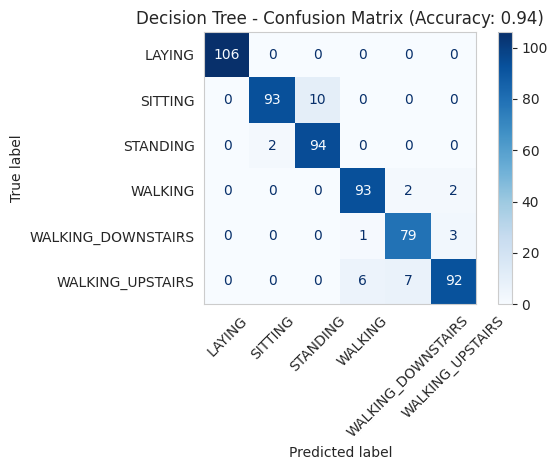

Classification Report:

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       106
           SITTING       0.98      0.90      0.94       103
          STANDING       0.90      0.98      0.94        96
           WALKING       0.93      0.96      0.94        97
WALKING_DOWNSTAIRS       0.90      0.95      0.92        83
  WALKING_UPSTAIRS       0.95      0.88      0.91       105

          accuracy                           0.94       590
         macro avg       0.94      0.94      0.94       590
      weighted avg       0.95      0.94      0.94       590



In [ ]:
#  Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

#  Load the dataset
# Replace 'train.csv' with your actual dataset filename
# Use the train_data DataFrame already loaded from Google Drive
train = train_data # Changed from pd.read_csv("train.csv")

#  Prepare Features and Labels
X = train.drop(['Activity', 'subject'], axis=1, errors='ignore')  # remove 'subject' if present
y = train['Activity']

#  Encode Activity Labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Feature Scaling (optional for Decision Tree but improves comparability)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Make Predictions
y_pred = dt_model.predict(X_test_scaled)

#  Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(10, 6))
# Corrected the incomplete line to call ConfusionMatrixDisplay correctly
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues', xticks_rotation=45) # Added cmap for color and xticks_rotation for readability
plt.title(f"Decision Tree - Confusion Matrix (Accuracy: {acc:.2f})") # Added title for clarity
plt.grid(False)
plt.tight_layout()
plt.show()

# 🧾 Show classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

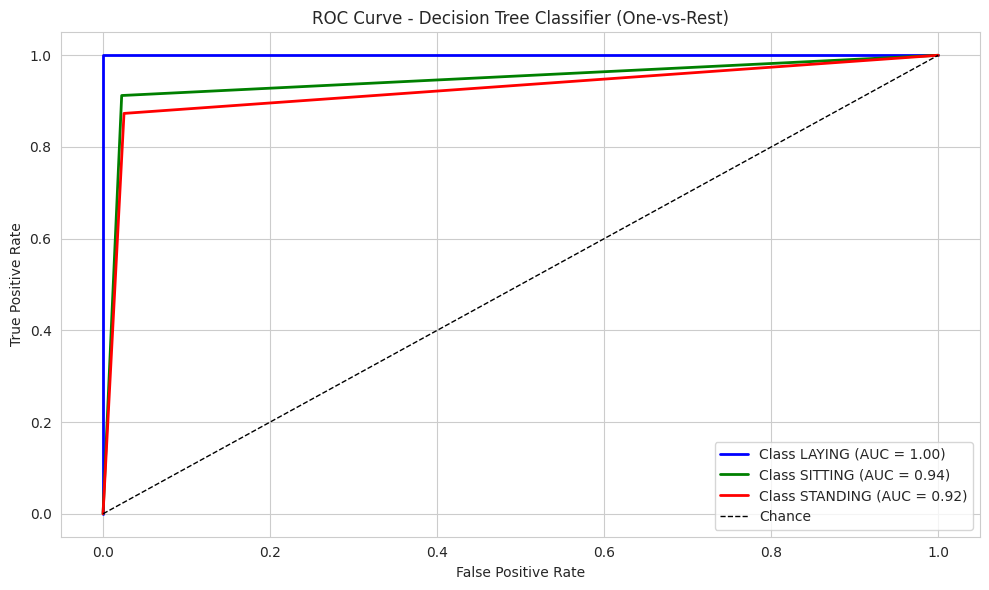

Macro-average AUC Score: 0.95


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Load dataset
# train = pd.read_csv("train.csv")  # Replace with your dataset name
# Load the train data from the correct path in Google Drive
train = pd.read_csv("/content/drive/MyDrive/train.csv") # Corrected file path

X = train.drop(['Activity', 'subject'], axis=1, errors='ignore')
y = train['Activity']

# Encode and binarize target
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_binary = label_binarize(y_encoded, classes=np.unique(y_encoded))
n_classes = y_binary.shape[1]

#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

#  Feature scaling (optional for trees, but included for consistency)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Train Decision Tree Classifier (multi-class with OneVsRest)
dt_model = OneVsRestClassifier(DecisionTreeClassifier())
dt_model.fit(X_train_scaled, y_train)

# Predict probabilities
y_score = dt_model.predict_proba(X_test_scaled)

#  Compute ROC and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#  Plot ROC Curve for first 3 classes (for clarity)
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red']
for i, color in zip(range(min(3, n_classes)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {le.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1, label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree Classifier (One-vs-Rest)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# 🧾 Optional: Macro AUC
macro_auc = roc_auc_score(y_test, y_score, average='macro')
print(f"Macro-average AUC Score: {macro_auc:.2f}")

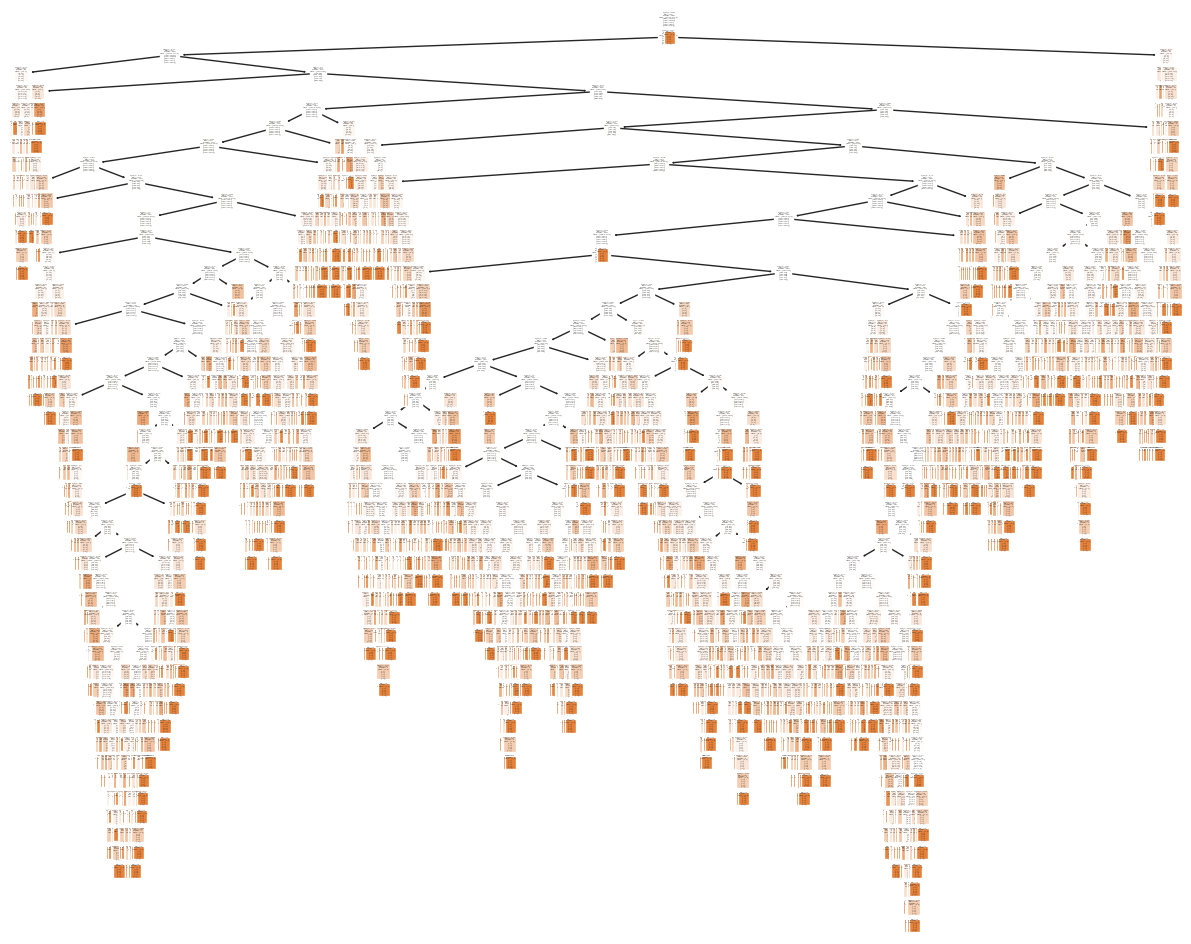

In [ ]:
fig = plt.figure(figsize=(15,12))
tree.plot_tree(tdt , filled=True)
plt.show()

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Convert one-hot labels to 1D class labels
y_train_single = np.argmax(y_train, axis=1)
y_test_single = np.argmax(y_test, axis=1)

# Train the RandomForest model
rf = RandomForestClassifier().fit(x_train, y_train_single)

# Evaluate the model
evaluate_classification(rf, "RandomForestClassifier", x_train, x_test, y_train_single, y_test_single)



Model: RandomForestClassifier

Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.33      0.25       280
           1       0.20      0.22      0.21       262
           2       0.20      0.25      0.22       276
           3       0.16      0.13      0.14       247
           4       0.16      0.05      0.08       206
           5       0.15      0.08      0.11       200

    accuracy                           0.19      1471
   macro avg       0.18      0.18      0.17      1471
weighted avg       0.18      0.19      0.18      1471


Confusion Matrix:
[[93 42 73 37 14 21]
 [91 58 53 32 11 17]
 [88 47 69 41 18 13]
 [78 47 62 32  7 21]
 [61 45 44 29 11 16]
 [52 46 50 27  9 16]]

ROC AUC Score (Multi-class): 0.5075


<Figure size 1000x600 with 0 Axes>

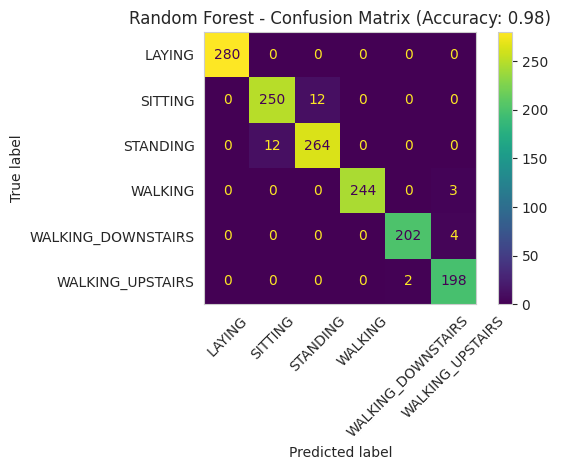

Classification Report:

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       280
           SITTING       0.95      0.95      0.95       262
          STANDING       0.96      0.96      0.96       276
           WALKING       1.00      0.99      0.99       247
WALKING_DOWNSTAIRS       0.99      0.98      0.99       206
  WALKING_UPSTAIRS       0.97      0.99      0.98       200

          accuracy                           0.98      1471
         macro avg       0.98      0.98      0.98      1471
      weighted avg       0.98      0.98      0.98      1471



In [ ]:
#  Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

#  Load your dataset
# Replace with actual dataset path if needed
# train = pd.read_csv("train.csv")  # Example filename - This line caused the error
# Use the train_data DataFrame already loaded from Google Drive
train = train_data # Changed from pd.read_csv("train.csv")

#  Split features and labels
X = train.drop(['Activity', 'subject'], axis=1, errors='ignore')  # drop subject if present
y = train['Activity']

#  Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

#  Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

#  Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

#  Predict
y_pred = rf.predict(X_test_scaled)

#  Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

#  Display Confusion Matrix
plt.figure(figsize=(10, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='viridis', xticks_rotation=45)
plt.title(f"Random Forest - Confusion Matrix (Accuracy: {accuracy:.2f})")
plt.grid(False)
plt.tight_layout()
plt.show()

#  Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

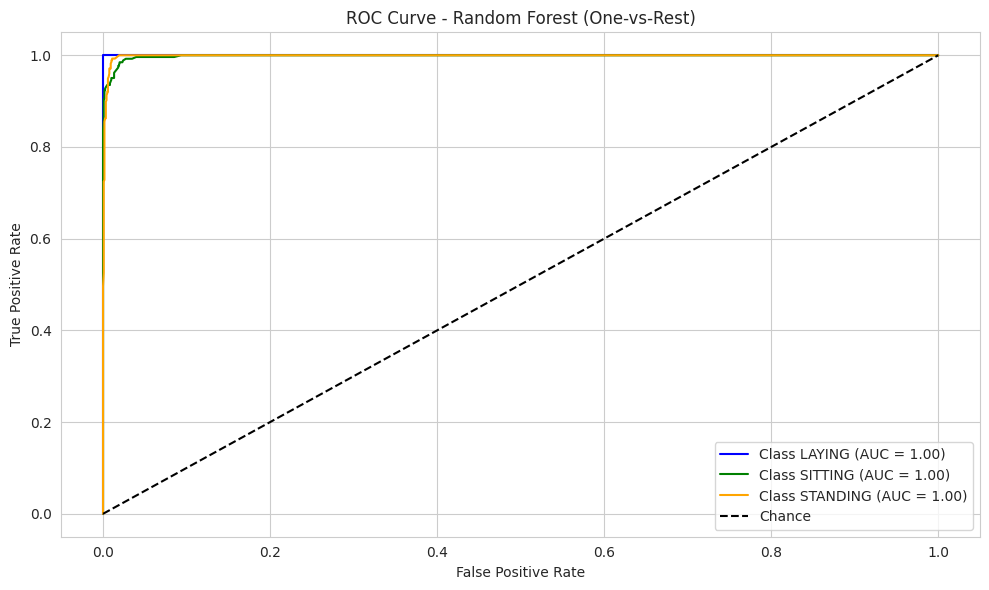

Macro-average AUC Score: 1.00


In [ ]:
#  Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score

#  Load the dataset
# train = pd.read_csv("train.csv")  # Replace with your filename
# Load the train data from the correct path in Google Drive
train = pd.read_csv("/content/drive/MyDrive/train.csv") # Corrected file path

X = train.drop(['Activity', 'subject'], axis=1, errors='ignore')  # Drop 'subject' if present
y = train['Activity']

#  Encode target labels and binarize
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_binary = label_binarize(y_encoded, classes=np.unique(y_encoded))
n_classes = y_binary.shape[1]

#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

#  Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Train Random Forest using One-vs-Rest
rf_model = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
rf_model.fit(X_train_scaled, y_train)

#  Predict probabilities
y_score = rf_model.predict_proba(X_test_scaled)

#  Calculate ROC curves and AUCs
fpr, tpr, roc_auc = {}, {}, {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve for first 3 classes (for clarity)
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'orange']
for i, color in zip(range(min(3, n_classes)), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label=f"Class {le.classes_[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest (One-vs-Rest)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# Macro-average AUC
macro_auc = roc_auc_score(y_test, y_score, average='macro')
print(f"Macro-average AUC Score: {macro_auc:.2f}")

In [ ]:
import numpy as np
from sklearn import preprocessing
from xgboost import XGBClassifier

# STEP 1: Convert one-hot encoded labels to 1D labels
y_train_single = np.argmax(y_train, axis=1)
y_test_single = np.argmax(y_test, axis=1)

# STEP 2: Encode labels if necessary (optional for XGBoost, but shown for consistency)
le = preprocessing.LabelEncoder().fit(y_train_single)
y_xgb_train = le.transform(y_train_single)
y_xgb_test = le.transform(y_test_single)

# STEP 3: Define XGBoost parameters
xgb_params = {
    'n_estimators': 100,
    'learning_rate': 0.2,
    'subsample': 0.927,
    'colsample_bytree': 0.88,
    'max_depth': 5,
    'booster': 'gbtree',
    'reg_lambda': 38,
    'reg_alpha': 32,
    'random_state': 12
}

# STEP 4: Train the XGBoost model
xgb = XGBClassifier(**xgb_params)
xgb.fit(x_train, y_xgb_train)

# STEP 5: Evaluate the model
evaluate_classification(xgb, "XGBClassifier", x_train, x_test, y_xgb_train, y_xgb_test)



Model: XGBClassifier

Classification Report:
              precision    recall  f1-score   support

           0       0.19      0.30      0.23       280
           1       0.16      0.19      0.17       262
           2       0.22      0.33      0.26       276
           3       0.16      0.11      0.13       247
           4       0.10      0.01      0.02       206
           5       0.10      0.06      0.07       200

    accuracy                           0.18      1471
   macro avg       0.15      0.17      0.15      1471
weighted avg       0.16      0.18      0.16      1471


Confusion Matrix:
[[84 61 78 40  1 16]
 [79 49 74 29  6 25]
 [86 53 90 28  1 18]
 [75 49 68 28  6 21]
 [72 42 52 24  2 14]
 [58 47 50 29  5 11]]

ROC AUC Score (Multi-class): 0.4997


In [ ]:
import numpy as np
from sklearn import preprocessing
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split # Import train_test_split

# Re-perform the train-test split to ensure y_train and y_test are 1D
# Assuming X and y are the original features and labels from cell 829c97ee
# If X and y are not in scope, you might need to re-run cell 829c97ee or load the data again.
# Assuming X and y are available and are the 1D labels
x_train, x_test, y_train_1d, y_test_1d = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)


# Ensure y_train and y_test are in 1D format for LabelEncoder and XGBoost
le = preprocessing.LabelEncoder().fit(y_train_1d)
y_xgb_train = le.transform(y_train_1d)
y_xgb_test = le.transform(y_test_1d)

xgb_params = {'n_estimators': 100,
              'learning_rate': 0.2,
              'subsample': 0.927,
              'colsample_bytree': 0.88,
              'max_depth': 5,
              'booster': 'gbtree',
              'reg_lambda': 38,
              'reg_alpha': 32,
              'random_state': 12}
# Use x_train and x_test from the split, and the 1D encoded labels
xgb = XGBClassifier(**xgb_params).fit(x_train, y_xgb_train)
# Need to make sure evaluate_classification can handle 1D y_test
# Assuming evaluate_classification expects 1D labels for accuracy, precision, recall, and confusion matrix
evaluate_classification(xgb, "XGBClassifier", x_train, x_test, y_xgb_train, y_xgb_test)


Model: XGBClassifier

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       280
           1       0.97      0.93      0.95       262
           2       0.94      0.97      0.95       276
           3       0.99      0.98      0.99       247
           4       0.99      0.98      0.99       206
           5       0.98      0.99      0.98       200

    accuracy                           0.98      1471
   macro avg       0.98      0.98      0.98      1471
weighted avg       0.98      0.98      0.98      1471


Confusion Matrix:
[[280   0   0   0   0   0]
 [  0 244  18   0   0   0]
 [  0   8 268   0   0   0]
 [  0   0   0 243   0   4]
 [  0   0   0   3 202   1]
 [  0   0   0   0   2 198]]

ROC AUC Score (Multi-class): 0.9992


<Figure size 1000x600 with 0 Axes>

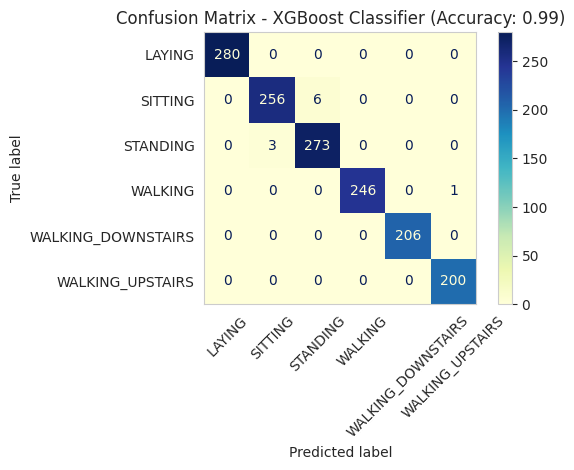

Classification Report:

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       280
           SITTING       0.99      0.98      0.98       262
          STANDING       0.98      0.99      0.98       276
           WALKING       1.00      1.00      1.00       247
WALKING_DOWNSTAIRS       1.00      1.00      1.00       206
  WALKING_UPSTAIRS       1.00      1.00      1.00       200

          accuracy                           0.99      1471
         macro avg       0.99      0.99      0.99      1471
      weighted avg       0.99      0.99      0.99      1471



In [ ]:
#  Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from xgboost import XGBClassifier

#  Load Dataset
# train = pd.read_csv("train.csv")  # Replace with your actual dataset name
# Use the train_data DataFrame already loaded from Google Drive
train = train_data # Corrected the file loading line to use the existing DataFrame

# Separate Features and Target
X = train.drop(['Activity', 'subject'], axis=1, errors='ignore')  # Drop 'subject' if it exists
y = train['Activity']

#  Encode Target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

#  Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

#  Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train_scaled, y_train)

#  Predictions
y_pred = xgb.predict(X_test_scaled)

# Confusion Matrix & Accuracy
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

#  Plot Confusion Matrix
plt.figure(figsize=(10, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='YlGnBu', xticks_rotation=45)
plt.title(f"Confusion Matrix - XGBoost Classifier (Accuracy: {accuracy:.2f})")
plt.grid(False)
plt.tight_layout()
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

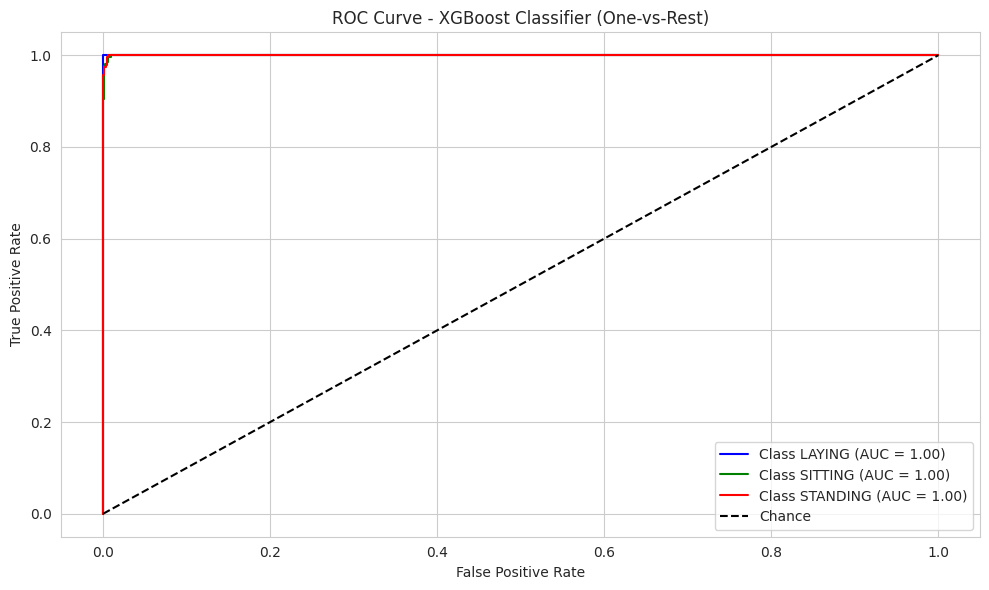

Macro-average AUC Score: 1.00


In [ ]:
# Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsRestClassifier

#  Load the dataset
# Replace 'train.csv' with your actual file path
# The error occurs because the file is not found in the current directory.
# Load the train data from the correct path in Google Drive
train = pd.read_csv("/content/drive/MyDrive/train.csv") # Corrected file path

#  Feature and Target separation
X = train.drop(['Activity', 'subject'], axis=1, errors='ignore')
y = train['Activity']

#  Encode and binarize target for multi-class ROC
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_binary = label_binarize(y_encoded, classes=np.unique(y_encoded))
n_classes = y_binary.shape[1]

#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

#  Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  XGBoost Classifier with One-vs-Rest
# Suppress the deprecation warning for use_label_encoder
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
model = OneVsRestClassifier(XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
model.fit(X_train_scaled, y_train)
warnings.filterwarnings("default", category=UserWarning) # Reset warning filter

#  Predict probabilities
y_score = model.predict_proba(X_test_scaled)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#  Plot ROC Curve (first 3 classes for clarity)
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red']
for i, color in zip(range(min(3, n_classes)), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label=f"Class {le.classes_[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.title("ROC Curve - XGBoost Classifier (One-vs-Rest)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

#  Macro-average AUC Score
macro_auc = roc_auc_score(y_test, y_score, average='macro')
print(f"Macro-average AUC Score: {macro_auc:.2f}")

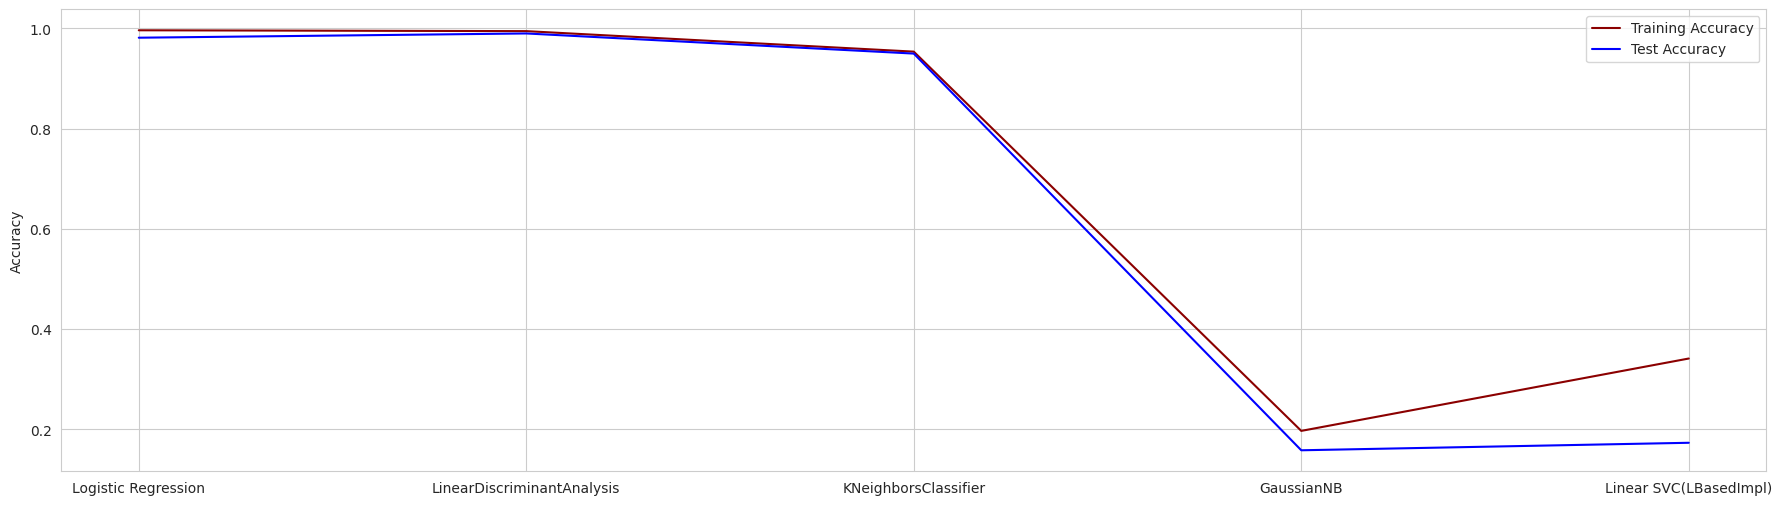

In [ ]:
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(22, 6))
ax.plot(np.arange(len(keys)) , [value[0] for value in values], color='darkred')
ax.plot(np.arange(len(keys)) , [value[1] for value in values], color='b')
ax.legend(["Training Accuracy", "Test Accuracy"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Accuracy")
plt.show()

/tmp/ipython-input-119-3211492091.py:7: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



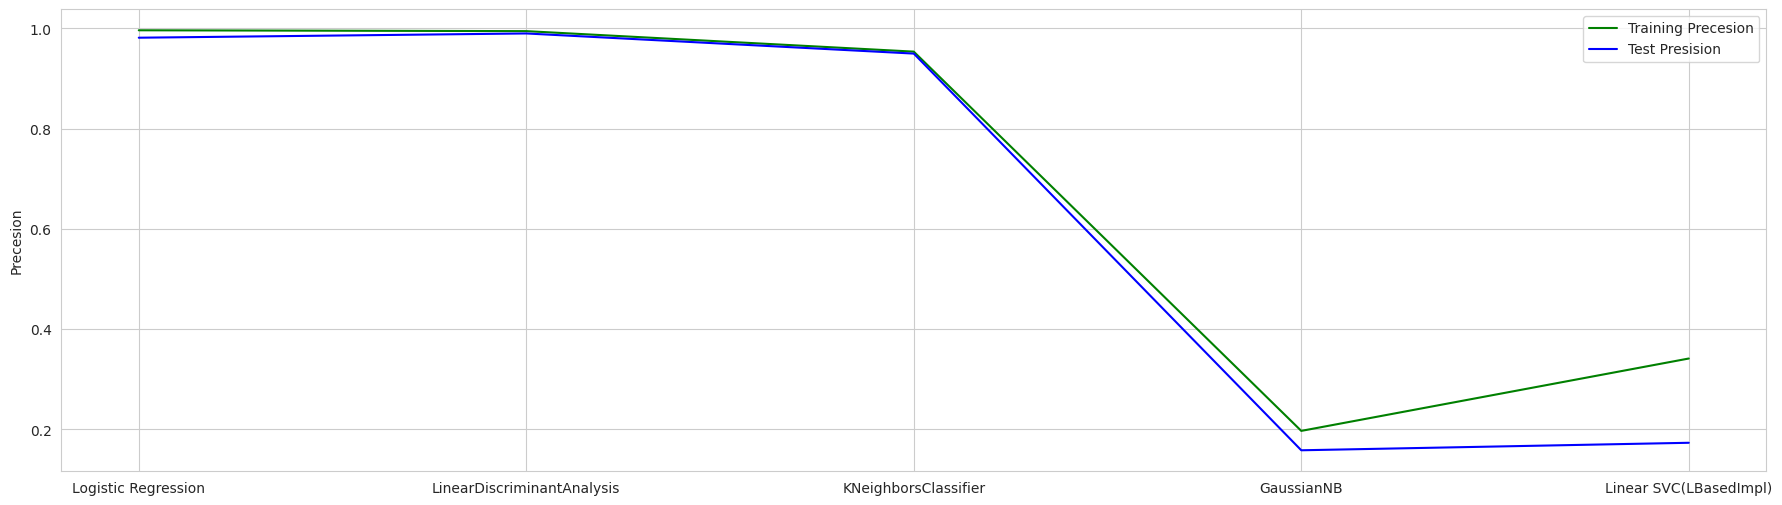

In [ ]:
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(22, 6))
ax.plot(np.arange(len(keys)), [value[2] for value in values], color='g')
ax.plot(np.arange(len(keys)), [value[3] for value in values], color='b')
ax.legend(["Training Precesion", "Test Presision"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Precesion")
plt.show()

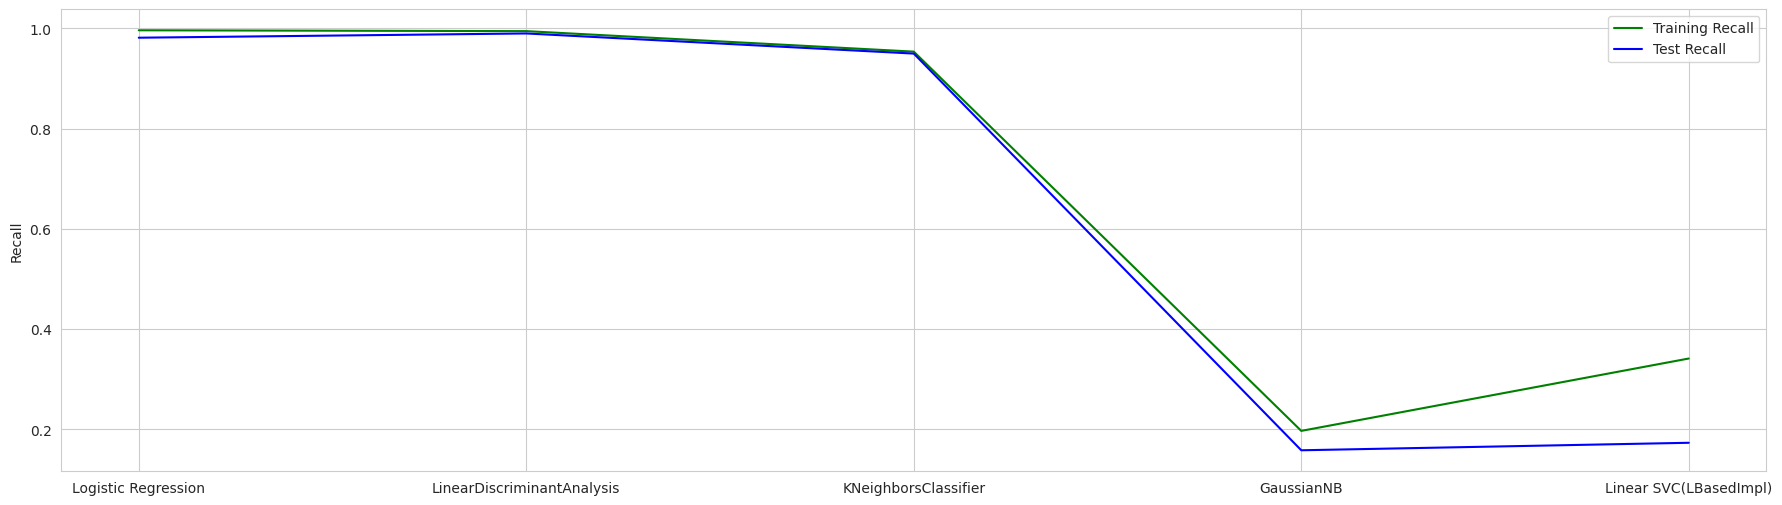

In [ ]:
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(22, 6))
ax.plot(np.arange(len(keys)), [value[4] for value in values], color='g')
ax.plot(np.arange(len(keys)), [value[5] for value in values], color='b')
ax.legend(["Training Recall", "Test Recall"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Recall")
plt.show()


Model: Linear SVC(PCA)

Training Accuracy: 99.87%  Test Accuracy: 98.31%
Training Precision: 99.87%  Test Precision: 98.31%
Training Recall: 99.87%  Test Recall: 98.31%

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       0.92      0.98      0.95        89
           2       0.98      0.93      0.96       119
           3       1.00      1.00      1.00       104
           4       1.00      1.00      1.00        85
           5       1.00      1.00      1.00        93

    accuracy                           0.98       590
   macro avg       0.98      0.99      0.98       590
weighted avg       0.98      0.98      0.98       590



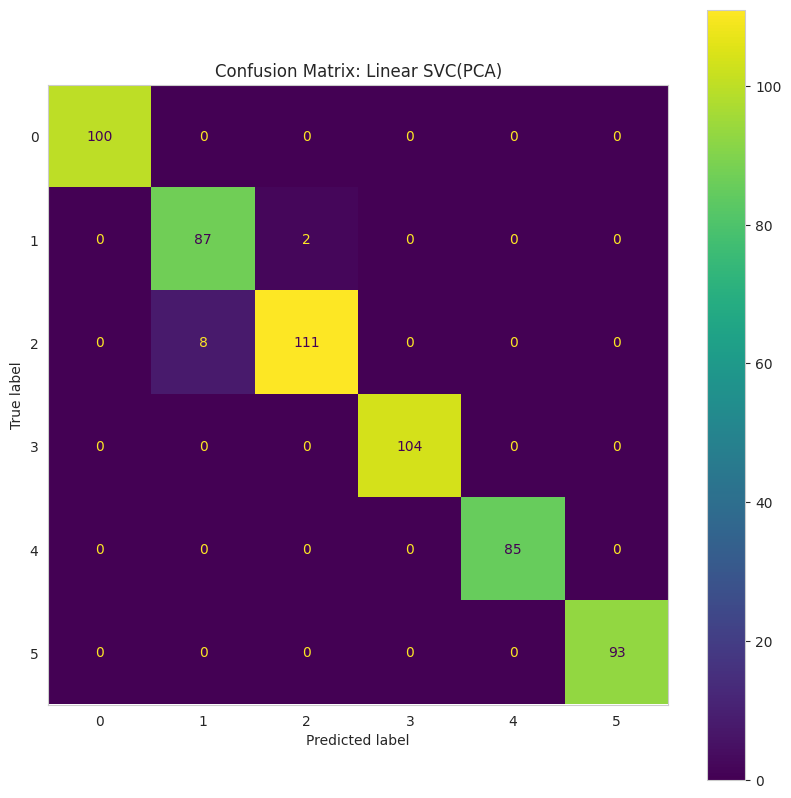


ROC AUC Score (Multi-class): 0.9988


In [ ]:
from sklearn import svm
from sklearn.preprocessing import LabelEncoder

# Convert string labels to integers
le = LabelEncoder()
y_train_pca_enc = le.fit_transform(y_train_pca)
y_test_pca_enc = le.transform(y_test_pca)

# Train Linear SVC on PCA-reduced features
lin_svc_pca = svm.LinearSVC().fit(x_train_pca, y_train_pca_enc)

# Evaluate using consistent integer labels
evaluate_classification(lin_svc_pca, "Linear SVC(PCA)", x_train_pca, x_test_pca, y_train_pca_enc, y_test_pca_enc)


   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  tBodyAcc-max()-Y 

<Figure size 1000x600 with 0 Axes>

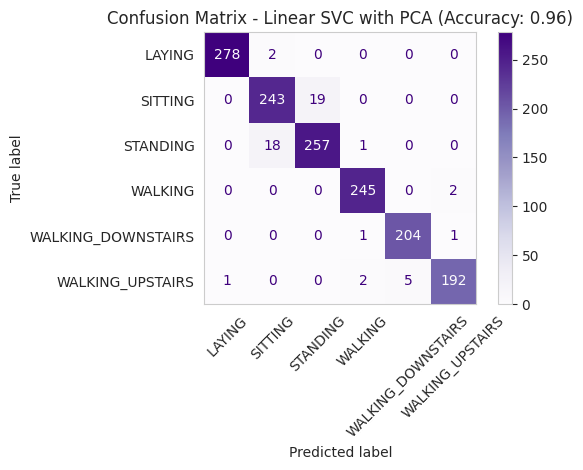

Classification Report:

                    precision    recall  f1-score   support

            LAYING       1.00      0.99      0.99       280
           SITTING       0.92      0.93      0.93       262
          STANDING       0.93      0.93      0.93       276
           WALKING       0.98      0.99      0.99       247
WALKING_DOWNSTAIRS       0.98      0.99      0.98       206
  WALKING_UPSTAIRS       0.98      0.96      0.97       200

          accuracy                           0.96      1471
         macro avg       0.97      0.97      0.97      1471
      weighted avg       0.96      0.96      0.96      1471



In [ ]:
#  Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

#  Load dataset
# train = pd.read_csv("train.csv")  # Replace with your actual file
# Load the train data from the correct path in Google Drive
train = pd.read_csv("/content/drive/MyDrive/train.csv")  # Corrected file path
print(train.head())

#  Define Features and Target
X = train.drop(['Activity', 'subject'], axis=1, errors='ignore')
y = train['Activity']

# Encode Activity Labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

#  Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

#  Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Apply PCA (optional: n_components can be tuned)
pca = PCA(n_components=0.95)  # Retain 95% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

#  Train Linear SVC
svc_model = LinearSVC(max_iter=5000)
svc_model.fit(X_train_pca, y_train)

#  Predict
y_pred = svc_model.predict(X_test_pca)

#  Confusion Matrix and Accuracy
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

#  Plot Confusion Matrix
plt.figure(figsize=(10, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Purples', xticks_rotation=45)
plt.title(f"Confusion Matrix - Linear SVC with PCA (Accuracy: {accuracy:.2f})")
plt.grid(False)
plt.tight_layout()
plt.show()

#  Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

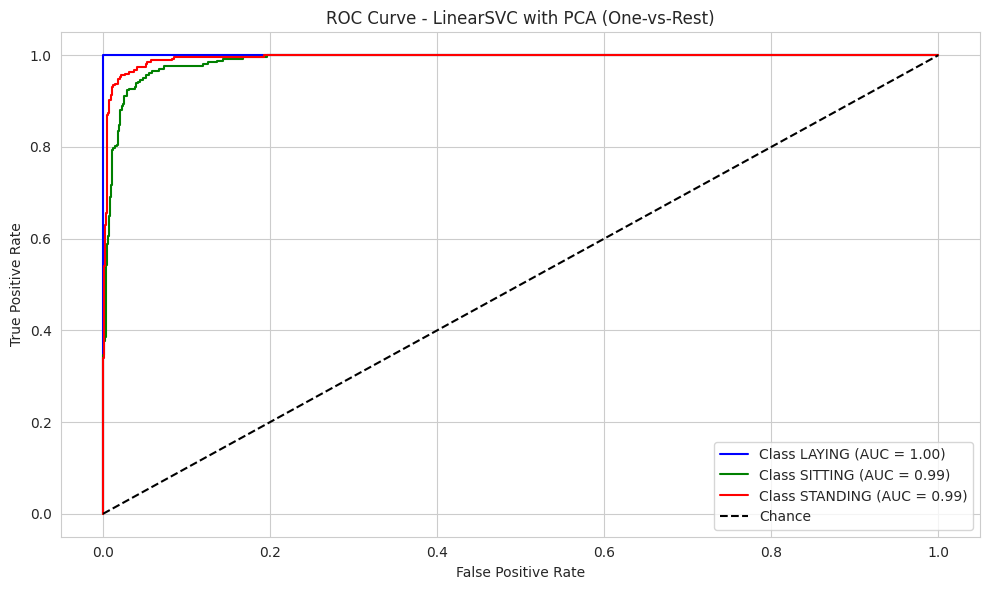

Macro-average AUC Score: 1.00


In [ ]:
#  Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score

#  Load dataset
# train = pd.read_csv("train.csv")  # Update to your actual filename
# Load the train data from the correct path in Google Drive
train = pd.read_csv("/content/drive/MyDrive/train.csv")  # Corrected file path
X = train.drop(['Activity', 'subject'], axis=1, errors='ignore')
y = train['Activity']

#  Encode and binarize target
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_binary = label_binarize(y_encoded, classes=np.unique(y_encoded))
n_classes = y_binary.shape[1]

#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for dimensionality reduction (retain 95% variance)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

#  Train Linear SVC with One-vs-Rest strategy
svc = LinearSVC(max_iter=10000)
clf = OneVsRestClassifier(svc)
clf.fit(X_train_pca, y_train)

#  Predict decision function scores
y_score = clf.decision_function(X_test_pca)

#  Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#  Plot ROC curves for first 3 classes
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red']
for i, color in zip(range(min(3, n_classes)), colors):
    plt.plot(fpr[i], tpr[i], color=color, label=f"Class {le.classes_[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.title("ROC Curve - LinearSVC with PCA (One-vs-Rest)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# 🧾 Print macro-average AUC score
macro_auc = roc_auc_score(y_test, y_score, average='macro')
print(f"Macro-average AUC Score: {macro_auc:.2f}")


Model: Linear SVC(Frequency)

Training Accuracy: 98.85%  Test Accuracy: 97.63%
Training Precision: 98.85%  Test Precision: 97.63%
Training Recall: 98.85%  Test Recall: 97.63%

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       100
           1       0.89      0.98      0.93        89
           2       0.97      0.91      0.94       119
           3       1.00      1.00      1.00       104
           4       1.00      1.00      1.00        85
           5       1.00      1.00      1.00        93

    accuracy                           0.98       590
   macro avg       0.98      0.98      0.98       590
weighted avg       0.98      0.98      0.98       590



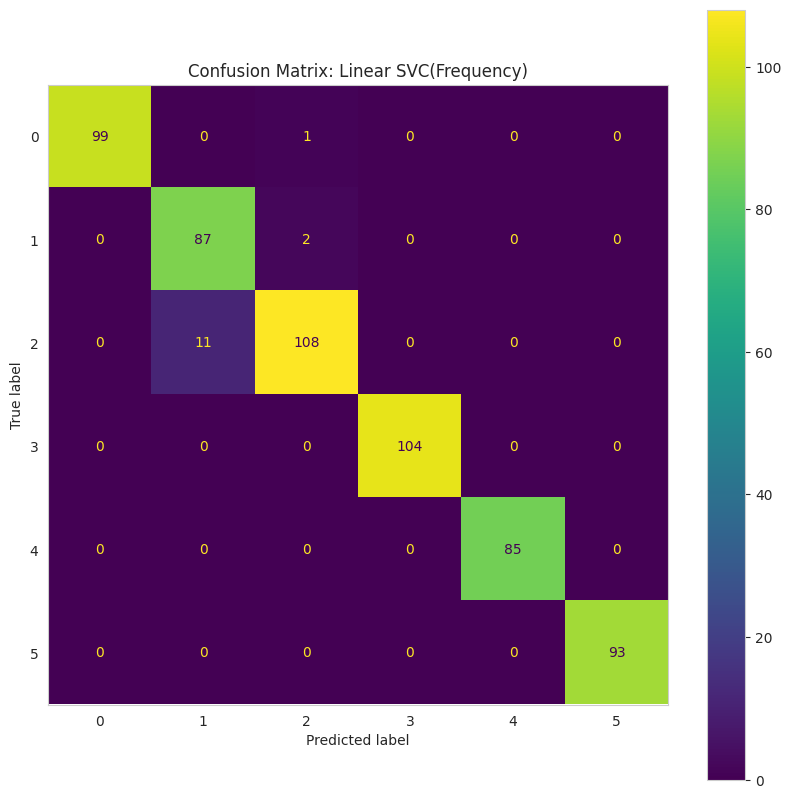


ROC AUC Score (Multi-class): 0.9976


In [ ]:
from sklearn import svm
from sklearn.preprocessing import LabelEncoder

# Encode string labels to numeric consistently
le = LabelEncoder()
y_train_f_enc = le.fit_transform(y_train_f)
y_test_f_enc = le.transform(y_test_f)

# Train the model
lin_svc_f = svm.LinearSVC().fit(x_train_f, y_train_f_enc)

# Evaluate using encoded labels
evaluate_classification(lin_svc_f, "Linear SVC(Frequency)", x_train_f, x_test_f, y_train_f_enc, y_test_f_enc)


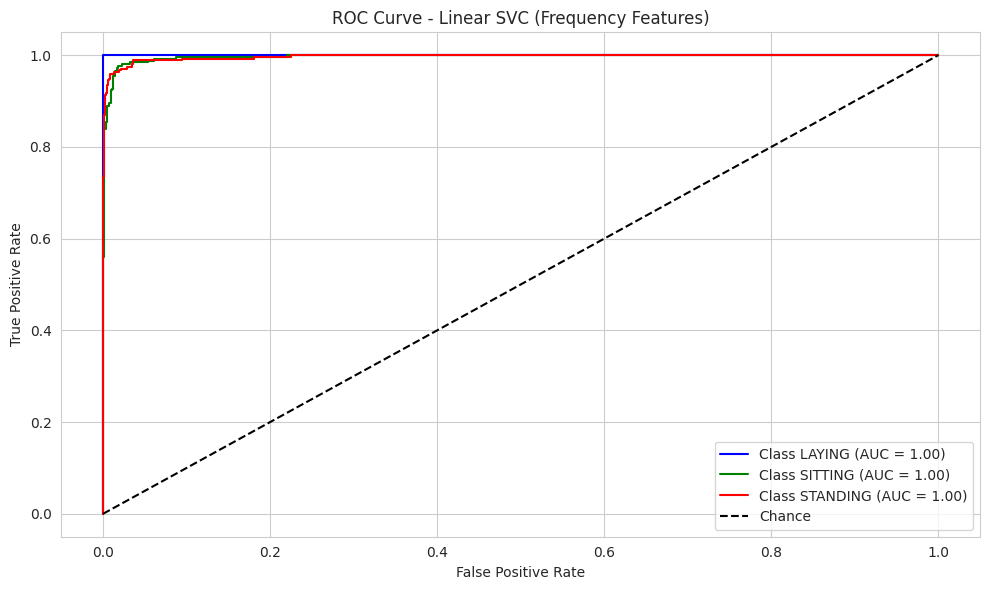

Macro-average AUC Score: 1.00


In [ ]:
#  Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score

#  Load your frequency-based dataset
# Replace with your actual file
# train = pd.read_csv("train.csv") # This line caused the error
# Load the train data from the correct path in Google Drive
train = pd.read_csv("/content/drive/MyDrive/train.csv") # Corrected file path

#  Features and Target
X = train.drop(['Activity', 'subject'], axis=1, errors='ignore')  # drop non-features
y = train['Activity']

#  Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_binary = label_binarize(y_encoded, classes=np.unique(y_encoded))
n_classes = y_binary.shape[1]

#  Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

#  Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear SVC wrapped with CalibratedClassifierCV
base_svc = LinearSVC(max_iter=10000)
calibrated_svc = CalibratedClassifierCV(base_svc, method='sigmoid', cv=3)
model = OneVsRestClassifier(calibrated_svc)
model.fit(X_train_scaled, y_train)

#  Predict Probabilities
y_score = model.predict_proba(X_test_scaled)

#  Compute ROC Curve and AUC
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#  Plot ROC Curves for First 3 Classes
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red']
for i, color in zip(range(min(3, n_classes)), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label=f"Class {le.classes_[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.title("ROC Curve - Linear SVC (Frequency Features)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

#  Print Macro AUC Score
macro_auc = roc_auc_score(y_test, y_score, average="macro")
print(f"Macro-average AUC Score: {macro_auc:.2f}")


Model: Linear SVC(Time)

Training Accuracy: 99.66%  Test Accuracy: 98.14%
Training Precision: 99.66%  Test Precision: 98.14%
Training Recall: 99.66%  Test Recall: 98.14%

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       0.91      0.97      0.94        89
           2       0.97      0.93      0.95       119
           3       1.00      1.00      1.00       104
           4       1.00      1.00      1.00        85
           5       1.00      1.00      1.00        93

    accuracy                           0.98       590
   macro avg       0.98      0.98      0.98       590
weighted avg       0.98      0.98      0.98       590



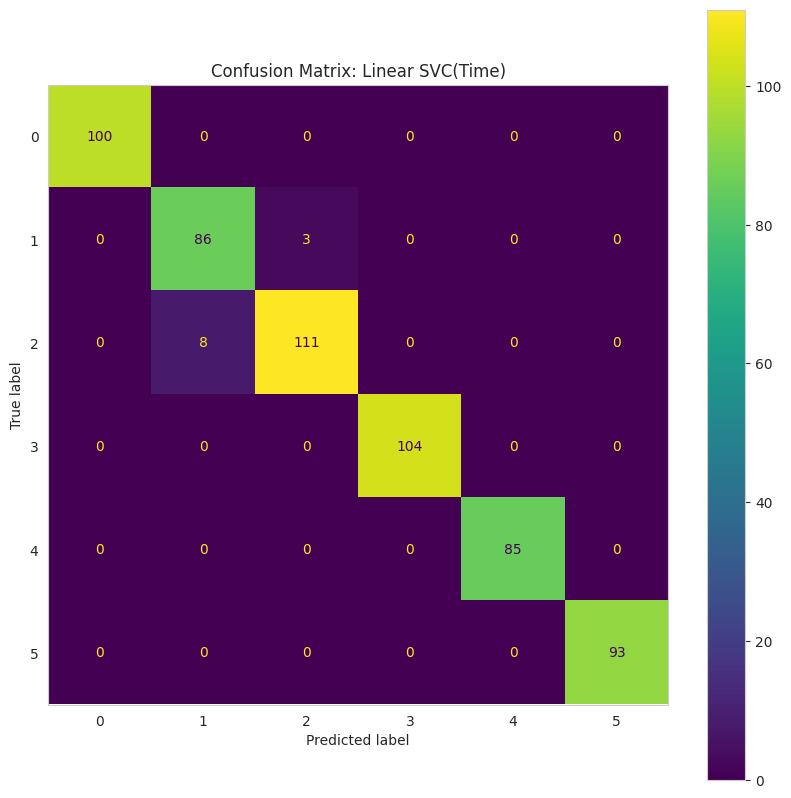


ROC AUC Score (Multi-class): 0.9992


In [ ]:
from sklearn import svm
from sklearn.preprocessing import LabelEncoder

# Encode labels consistently
le = LabelEncoder()
y_train_t_enc = le.fit_transform(y_train_t)
y_test_t_enc = le.transform(y_test_t)

# Train the Linear SVC model
lin_svc_t = svm.LinearSVC().fit(x_train_t, y_train_t_enc)

# Evaluate the model
evaluate_classification(lin_svc_t, "Linear SVC(Time)", x_train_t, x_test_t, y_train_t_enc, y_test_t_enc)


<Figure size 1000x600 with 0 Axes>

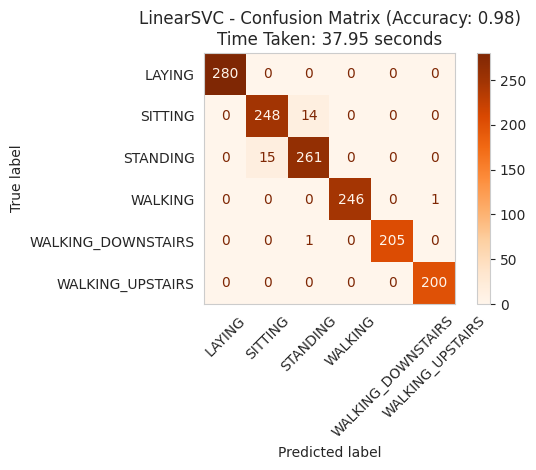

Classification Report:

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       280
           SITTING       0.94      0.95      0.94       262
          STANDING       0.95      0.95      0.95       276
           WALKING       1.00      1.00      1.00       247
WALKING_DOWNSTAIRS       1.00      1.00      1.00       206
  WALKING_UPSTAIRS       1.00      1.00      1.00       200

          accuracy                           0.98      1471
         macro avg       0.98      0.98      0.98      1471
      weighted avg       0.98      0.98      0.98      1471



In [ ]:
#  Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

#  Load your dataset
# Replace with your actual file if needed
# train = pd.read_csv("train.csv")  # Example filename - This line caused the error
# Use the train_data DataFrame already loaded from Google Drive
train = train_data # Changed from pd.read_csv("train.csv")

#  Features and Target
X = train.drop(['Activity', 'subject'], axis=1, errors='ignore')  # Exclude 'subject' if it exists
y = train['Activity']

#  Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

#  Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

#  Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ⏱ Time training and prediction
start_time = time.time()

#  Train LinearSVC model
model = LinearSVC(max_iter=5000)
model.fit(X_train_scaled, y_train)

#  Predict
y_pred = model.predict(X_test_scaled)

end_time = time.time()
elapsed_time = end_time - start_time

#  Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

#  Plot Confusion Matrix
plt.figure(figsize=(10, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Oranges', xticks_rotation=45)
plt.title(f"LinearSVC - Confusion Matrix (Accuracy: {accuracy:.2f})\nTime Taken: {elapsed_time:.2f} seconds")
plt.grid(False)
plt.tight_layout()
plt.show()

#  Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

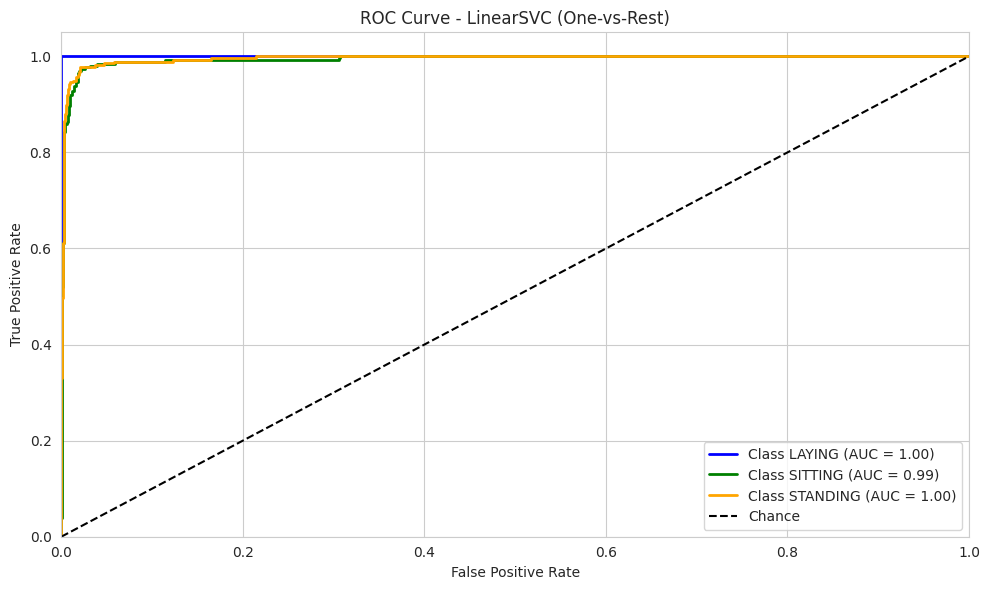

Macro-average AUC: 1.00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score

#  Load dataset
# train = pd.read_csv("train.csv")  # Replace with your dataset
# Load the train data from the correct path in Google Drive
train = pd.read_csv("/content/drive/MyDrive/train.csv") # Corrected file path
X = train.drop(['Activity', 'subject'], axis=1, errors='ignore')
y = train['Activity']

#  Encode and binarize target
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_binary = label_binarize(y_encoded, classes=np.unique(y_encoded))
n_classes = y_binary.shape[1]

#  Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

#  Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  One-vs-Rest Linear SVM (LinearSVC)
svc = OneVsRestClassifier(LinearSVC(max_iter=10000))
svc.fit(X_train_scaled, y_train)
y_score = svc.decision_function(X_test_scaled)

#  ROC Curve and AUC Calculation
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#  Plot ROC Curves (first 3 classes for clarity)
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'orange']
for i, color in zip(range(min(3, n_classes)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f"Class {le.classes_[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Chance")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - LinearSVC (One-vs-Rest)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

#  Macro AUC score
macro_auc = roc_auc_score(y_test, y_score, average="macro")
print(f"Macro-average AUC: {macro_auc:.2f}")

Selected top 180 features

Model: Linear SVC(K)

Training Accuracy: 99.15%  Test Accuracy: 96.95%
Training Precision: 99.15%  Test Precision: 96.95%
Training Recall: 99.15%  Test Recall: 96.95%

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       0.86      0.96      0.90        89
           2       0.96      0.88      0.92       119
           3       1.00      1.00      1.00       104
           4       1.00      1.00      1.00        85
           5       1.00      1.00      1.00        93

    accuracy                           0.97       590
   macro avg       0.97      0.97      0.97       590
weighted avg       0.97      0.97      0.97       590



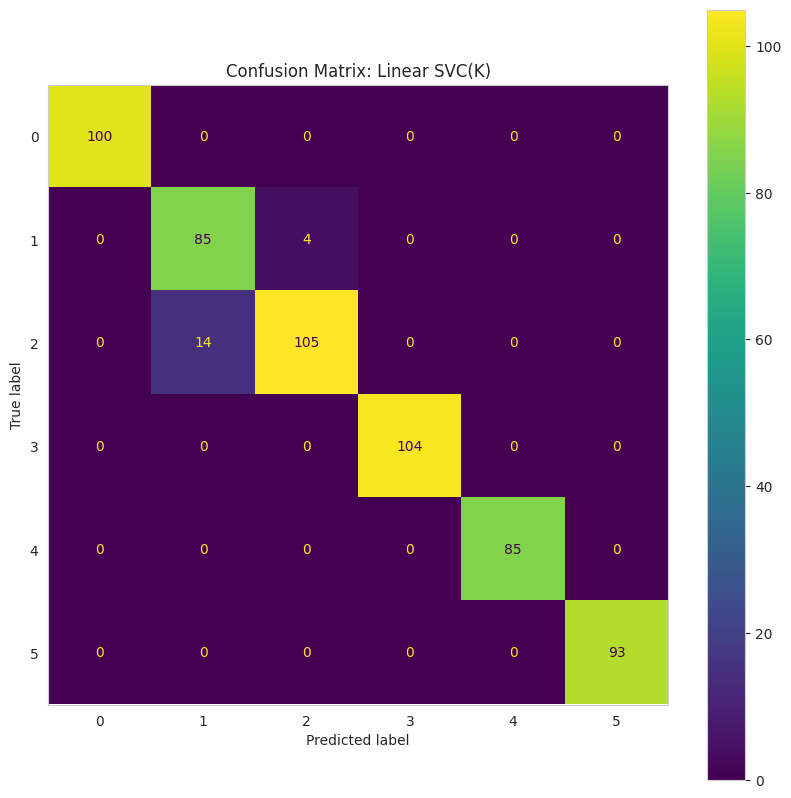


ROC AUC Score (Multi-class): 0.9985


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Assume X_t and y_t are already defined and matched in shape
# Step 1: Feature Selection using ANOVA F-test
X_selected = SelectKBest(score_func=f_classif, k=180).fit_transform(X_t, y_t)
print('Selected top {} features'.format(X_selected.shape[1]))

# Step 2: Label Encoding (in case labels are strings)
le = LabelEncoder()
y_encoded = le.fit_transform(y_t)

# Step 3: Train-test split
x_train_k, x_test_k, y_train_k, y_test_k = train_test_split(
    X_selected, y_encoded, test_size=0.2, shuffle=True, random_state=42
)

# Step 4: Train Linear SVC
lin_svc_k = LinearSVC().fit(x_train_k, y_train_k)

# Step 5: Evaluate the model
evaluate_classification(lin_svc_k, "Linear SVC(K)", x_train_k, x_test_k, y_train_k, y_test_k)


<Figure size 1000x600 with 0 Axes>

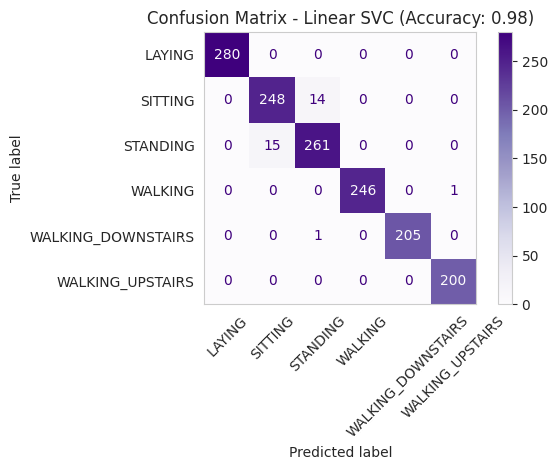

Classification Report:

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       280
           SITTING       0.94      0.95      0.94       262
          STANDING       0.95      0.95      0.95       276
           WALKING       1.00      1.00      1.00       247
WALKING_DOWNSTAIRS       1.00      1.00      1.00       206
  WALKING_UPSTAIRS       1.00      1.00      1.00       200

          accuracy                           0.98      1471
         macro avg       0.98      0.98      0.98      1471
      weighted avg       0.98      0.98      0.98      1471



In [ ]:
#  Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

#  Load the dataset
# Replace with the correct path to your file
# The error occurs because the file is not found in the current directory.
# Use the train_data DataFrame already loaded from Google Drive
train = train_data # Changed from pd.read_csv("train.csv")

# Define features and target
X = train.drop(['Activity', 'subject'], axis=1, errors='ignore')
y = train['Activity']

#  Encode the target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

#  Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Train Linear SVC model
svc_model = LinearSVC(max_iter=10000)
svc_model.fit(X_train_scaled, y_train)

#  Predict on test set
y_pred = svc_model.predict(X_test_scaled)

#  Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

#  Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Purples', xticks_rotation=45)
plt.title(f"Confusion Matrix - Linear SVC (Accuracy: {accuracy:.2f})")
plt.grid(False)
plt.tight_layout()
plt.show()

#  Print classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

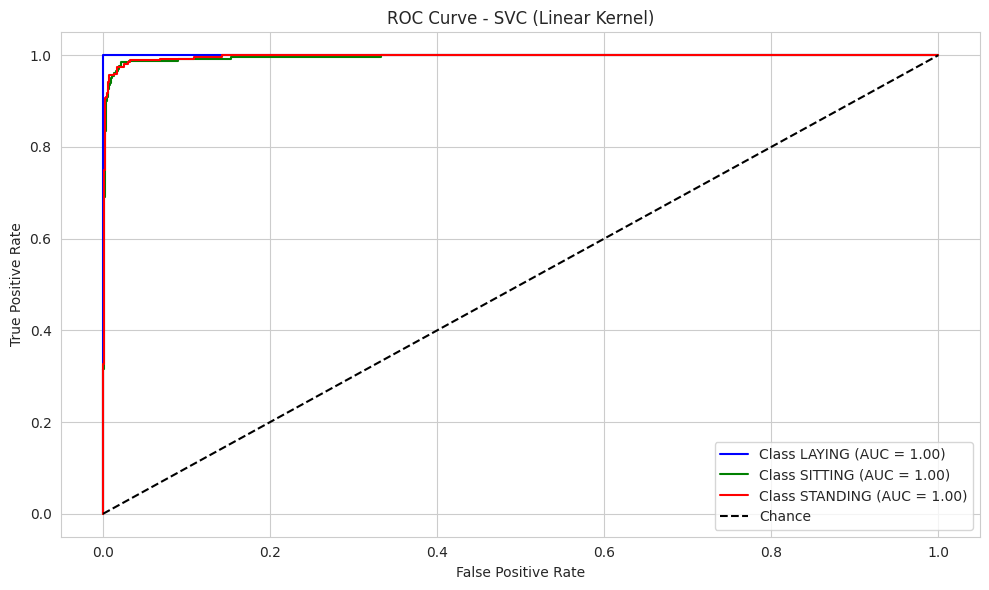

Macro-Average AUC Score: 1.00


In [ ]:
#  Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score

#  Load your dataset
# train = pd.read_csv("train.csv")  # Update this with your actual dataset
# Load the train data from the correct path in Google Drive
# train = pd.read_csv("/content/drive/MyDrive/train.csv") # Corrected file path
# Use the train_data DataFrame already loaded from Google Drive
train = train_data # Changed from pd.read_csv("train.csv") to use existing DataFrame


#  Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_binary = label_binarize(y_encoded, classes=np.unique(y_encoded))
n_classes = y_binary.shape[1]

#  Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

#  Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Linear SVC with probability=True
# Changed kernel to 'linear' as per the plot title 'SVC (Linear Kernel)'
# Added probability=True to allow for predict_proba needed for ROC curves
svc_model = OneVsRestClassifier(SVC(kernel="linear", probability=True, random_state=42))
svc_model.fit(X_train_scaled, y_train)
y_score = svc_model.predict_proba(X_test_scaled) # Use predict_proba

#  Compute ROC Curve and AUC for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#  Plot ROC Curve (for first 3 classes)
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red']
for i, color in zip(range(min(3, n_classes)), colors):
    plt.plot(fpr[i], tpr[i], color=color, label=f"Class {le.classes_[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.title("ROC Curve - SVC (Linear Kernel)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

#  Optional: Macro AUC
macro_auc = roc_auc_score(y_test, y_score, average='macro')
print(f"Macro-Average AUC Score: {macro_auc:.2f}")

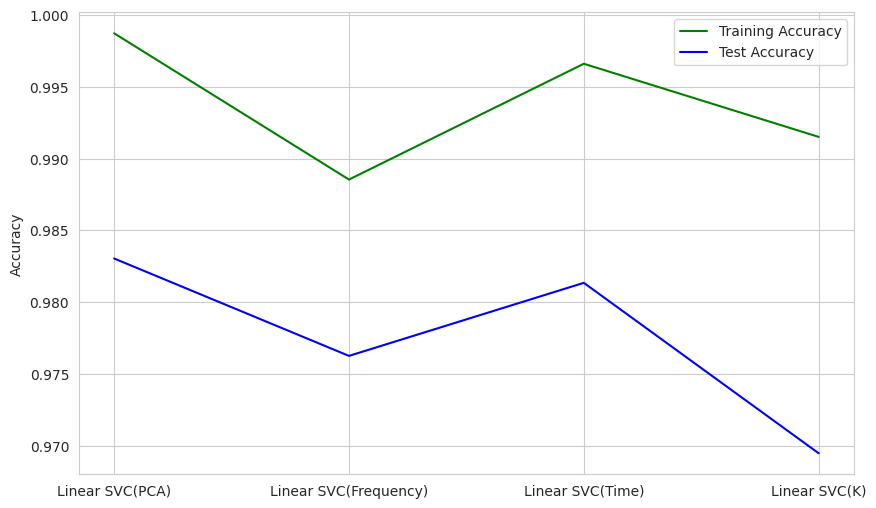

In [ ]:
skeys = ['Linear SVC(PCA)', 'Linear SVC(Frequency)', 'Linear SVC(Time)', 'Linear SVC(K)']
values = []
for i in skeys:  # <- use skeys here
    values.append(kernal_evals[i])

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.arange(len(skeys)), [value[0] for value in values], color='g')
ax.plot(np.arange(len(skeys)), [value[1] for value in values], color='b')
ax.legend(["Training Accuracy", "Test Accuracy"])
ax.set_xticks(np.arange(len(skeys)))
ax.set_xticklabels(skeys)
plt.ylabel("Accuracy")
plt.show()
